# **CAPSTONE FINAL (MACHINE LEARNING)**

## **Telco Customer Churn Dataset**

**Table of content :**

1. Business Understanding
2. Data Understanding
3. EDA (Exploratory Data Analysis)
4. Data Preparation and Preprocessing
5. Modelling Experiments
6. Final Model Evaluation
7. Conclusion and Recommendation
8. Deployment

****

## **1. Business Understanding**


### 1.1 Problem Statement
**"Optimizing Customer Retention Strategies in Telecommunications: Predictive Analysis of Customer Churn"**

In the competitive telecommunications sector, retaining customers is often more cost-effective than acquiring new ones. However, the industry is plagued with high customer churn rates due to competitive offerings, price sensitivity, and service dissatisfaction. This project aims to employ predictive analytics to identify customers at high risk of churn. By analyzing patterns in customer data such as tenure, services used, security features, and billing methods, we will develop a model to predict churn likelihood. This model will enable targeted interventions to improve customer satisfaction and retention strategies, thus reducing churn rates and enhancing profitability.

### 1.2 Possible Stakeholders
1. **Customer Service Management**: This group can use insights from the model to devise specific retention strategies or improve the overall customer service experience.
   
2. **Marketing Team**: They can use the model to identify potential churners and develop targeted marketing campaigns to retain them, perhaps offering special promotions or tailored communications based on the insights provided.

3. **Product Development**: Insights into which services are associated with higher churn can inform product adjustments or the development of new offerings that meet customer needs more effectively.

4. **Executive Leadership**: This group is interested in strategic decision-making based on data-driven insights to ensure competitive positioning and profitability in the market.

5. **IT Department**: Responsible for implementing data analytics tools and ensuring data quality, they need to maintain systems that support accurate and timely analysis of customer data.

This comprehensive approach not only aims to reduce churn but also strives to boost customer satisfaction and operational efficiency, directly impacting the company’s bottom line.

### 1.3 Goals

Throughout the entire process of this analysis, by the end of it, we expect to suffice in answering and give solutions for these points below :

- The characteristics of customers who left the service (`yes` Churn / class:1 )
- Predictions of the customers' chances churning (Stopped using service) 
- Strategies in how to prevent customers' from churning
- Most significant factors that influenced customers to churn

### 1.4 Metric Evaluation

Our main focus will be on customers who have left the company. The Classes are defined as follows:

- **0:** Indicates customers who did not leave the company. ( `no` Churn)
- **1:** Indicates customers who left the company. ( `yes` Churn)

Ensuring the accuracy of the model is crucial to avoid the financial impact of classification errors (false positives or false negatives).

| **Error Type**     |**Meaning** | **Outcome** | 
|-----------------|------------|----------------|
| **False Positive / Type 1 Error**  | The model incorrectly predicts that the customer will leave the company, when in fact they will not | Wasting human resources, funds, services, and time due to targeting customers who are already loyal |
| **False Negative / Type 2 Error**  | This happens when the model incorrectly predicts that the customer will not leave the company when, in fact, they will | Company will lose recurring revenue and spends more funds and time to acquire new customers| 

Below is the simulation of possible consequences of each type of error using the following references :
- Median of monthly charges around $70 per customer
- Average customer acquisition cost for telecomunication in the United States is $694

  [source](https://firstpagesage.com/reports/average-customer-acquisition-cost-cac-by-industry-b2b-edition-fc/)

- Retention cost for SaaS company 4-5 times smaller than CAC 

  [source](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=2c41201c1c7d)

**Type 1 Error Simulation**

Retention Cost= ($694/4)= $173.5 Loss per Customer

**Type 2 Error Simulation**

Recurring Revenue + Customer Acquisition Cost= ($70+ $694)= $764 Loss per Customer



**END OF CHAPTER 1**

*****

## **2. Data Understanding**

The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

In [159]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import RFECV

# Importing Additional Libraries
import scipy.stats as stats
import joblib
import time
import shap

# Plotting Utilities
import seaborn as sns
import matplotlib.pyplot as plt

# a desperate attempt to remove all those spam outputs
import warnings
warnings.filterwarnings("ignore")


### 2.1 Load Data

In [90]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


Shown above is the overview of our Dataset

### 2.2 Data Types, Cardinality, Missing Values, and Stats

In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB
None


From the Info above, It is shown that :

| Column Name | Data Type | Description |
| --- | --- | --- |
| Churn | String | Whether the customer churns or not |
| Dependents| String | Whether the customer has dependents or not |
| Tenure | Integer | How long customer using the services (customer lifetime) |
| OnlineSecurity | String | Whether the customer has online security or not |
| OnlineBackup | String | Whether the customer has online backup or not |
| InternetService | String | Whether the client is subscribed to Internet service |
| DeviceProtection | String | Whether the client has device protection or not |
| TechSupport | String | Whether the client has tech support or not |
| Contract | String | Type of contract according to duration |
| PaperlessBilling | String | Bills issued in paperless form |
| MonthlyCharges| Float | How much customer pay for services each month|

Since our main purpose is to classify customers who will leave the company, our attribute **Target** will be `Churn` while the rest would be our **Features**

In [92]:
display(df.describe(), df.describe(include=['object']))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


From the display above, it is shown that :

- Total customers of Telco is 4930 with 11 columns


(freq / count * 100)
- Dependents: 69.91% customers didn't have dependents
- Online Security: 49.59% customers didn't have online security
- Online Backup: 44.06% customers did't have online backup
- Internet Service: 44.06% customers have fiber optic as internet service
- Device Protection: 44.34% customers didn't have device protection
- Tech Support: 50.05% customers did't have tech support
- Contract: 55.18% customers choose Month-to-month as contract type
- Billing: 59.98% customers choose paperless form for billing
- Churn: 26.7% of customers churns
- Tenure: The median time of customers using the services is 29 Months
- Monthly Charges: The median value of monthly charges is $70

In [93]:
pd.DataFrame({
    'NaN Sum' : df.isna().sum(),
    'Sample': [df[col].unique() for col in df.columns],
    'Cardinality' : [df[col].nunique() for col in df.columns]

})

,NaN Sum,Sample,Cardinality
Dependents,0,"[Yes, No]",2
tenure,0,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1...",73
OnlineSecurity,0,"[No, Yes, No internet service]",3
OnlineBackup,0,"[No, Yes, No internet service]",3
InternetService,0,"[DSL, Fiber optic, No]",3
DeviceProtection,0,"[Yes, No internet service, No]",3
TechSupport,0,"[Yes, No, No internet service]",3
Contract,0,"[Month-to-month, Two year, One year]",3
PaperlessBilling,0,"[Yes, No]",2
MonthlyCharges,0,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,...",1422


From the Dataframe above it is shown that :
- The data has no missing values
- **Features** `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, and `TechSupport` need internet service to be available
- From all 10 features, 8 of them are Categorical, which cannot be processed by machine learning. We will need to change them in Preprocessing step on **Chapter 4**

**END OF CHAPTER 2**

****

## **3. EDA (Exploratory Data Analysis)**

Exploratory Data Analysis (EDA) is an essential step in understanding the data, identifying patterns, and uncovering insights. Below are structured approaches to performing EDA on the dataset:

1. **Distribution Analysis:** Visualize the distributions of numerical features of the target variable to identify Rare Labels and check for Imbalance.
2. **Numerical Correlation Analysis**: Analyze the correlations between each numerical features.
3. **Collinearity Analysis**: Visualize the distribution of categorical features and their relationship with the target variable to check if there are multicollinearity in the dataset.
4. **Test for Normality:** Check if the numerical features follow a normal distribution.


### 3.1 Distribution Analysis

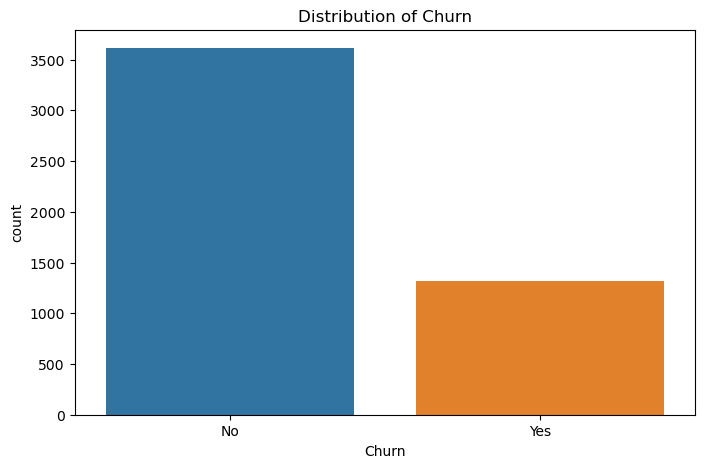

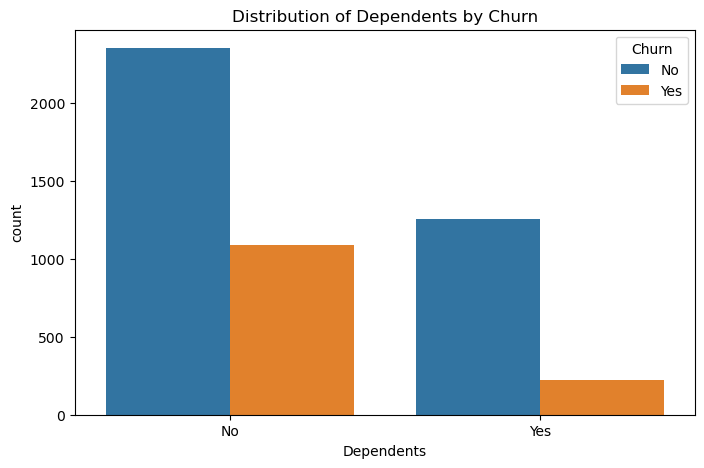

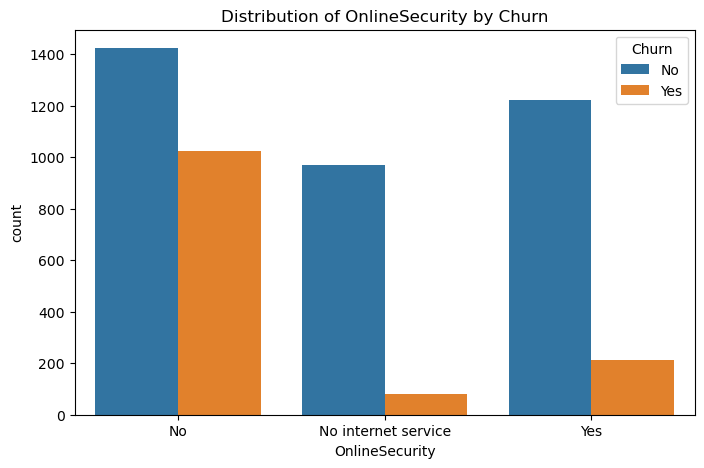

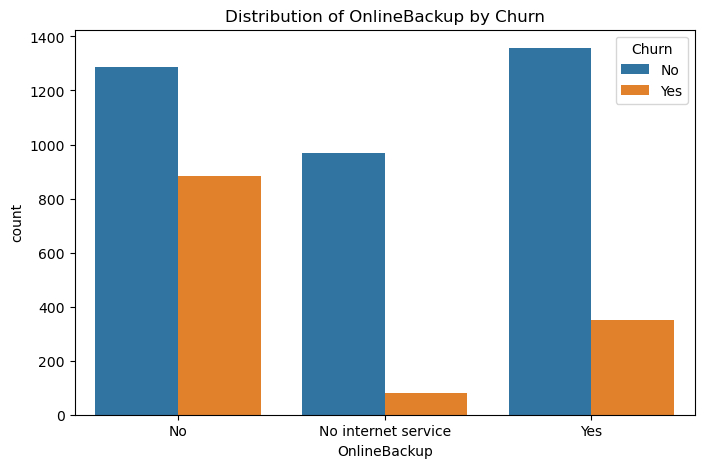

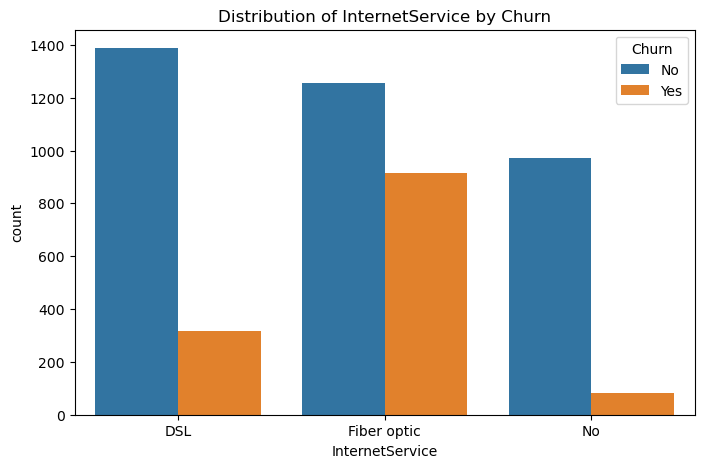

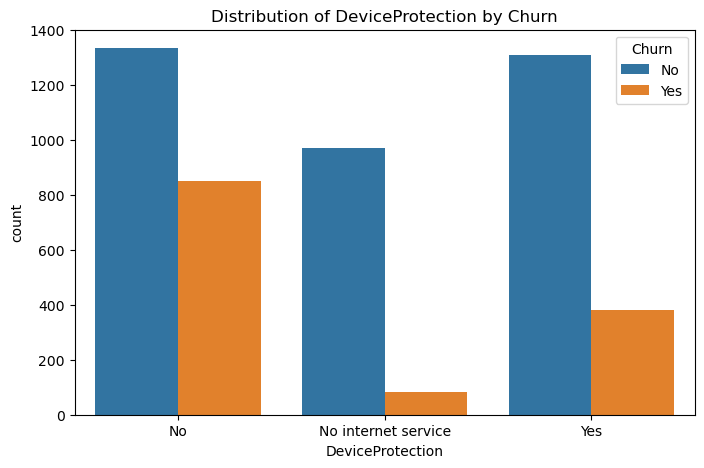

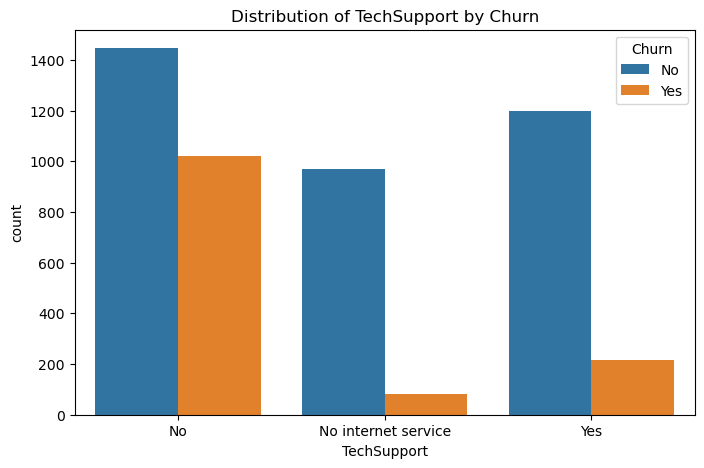

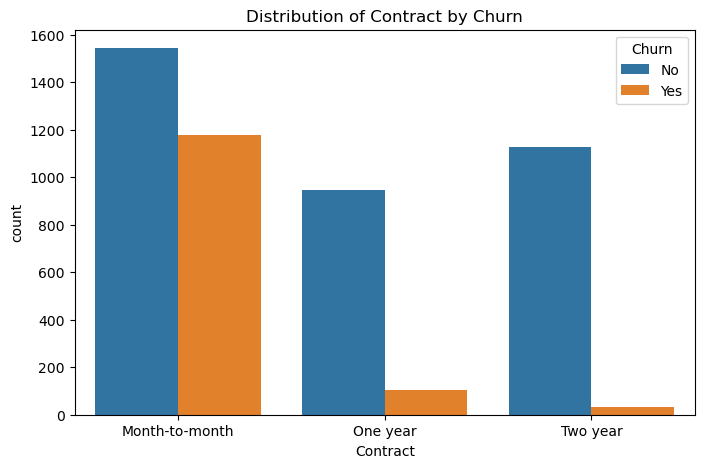

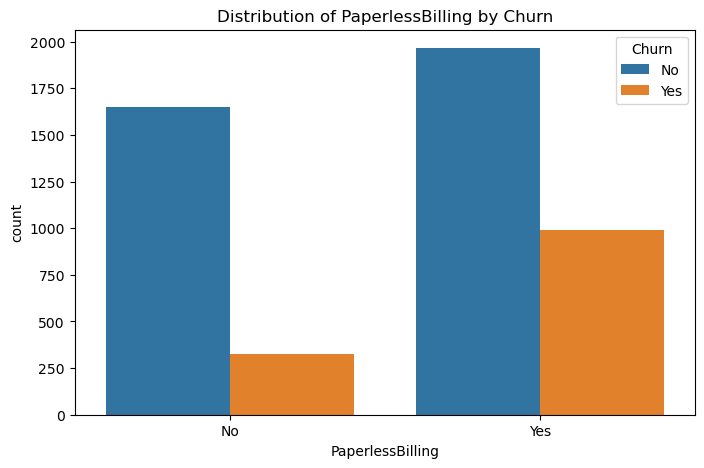

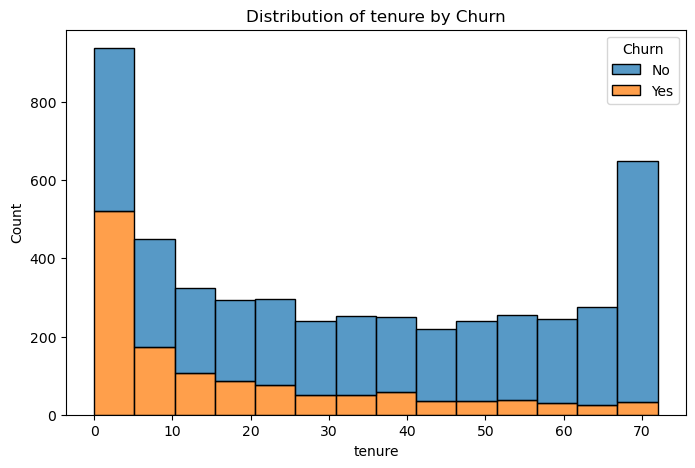

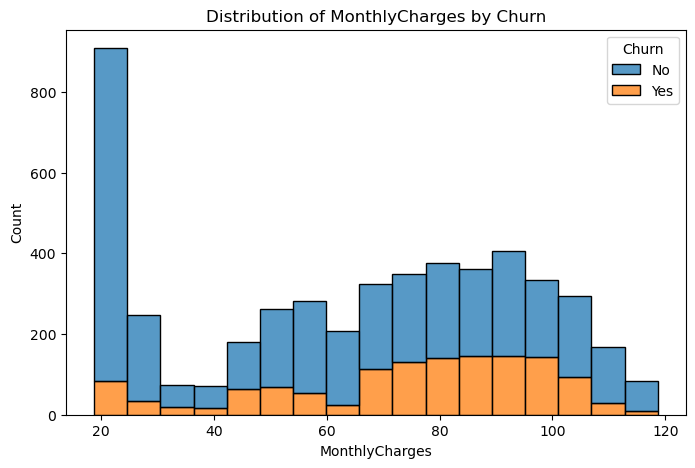

In [94]:
categorical_columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'Churn']

for col in categorical_columns:
    df[col] = df[col].astype('category')

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

categorical_columns.remove('Churn')  # Exclude the target variable

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

numerical_columns = ['tenure', 'MonthlyCharges']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack')
    plt.title(f'Distribution of {col} by Churn')
    plt.show()




**Categorical Rare Values**

In [197]:
def find_rare_values(df, categorical_columns, threshold=0.02):
    rare_values = {}
    for col in categorical_columns:
        value_counts = df[col].value_counts()
        rare = value_counts[value_counts < threshold * len(df)]
        if not rare.empty:
            rare_values[col] = rare
    return rare_values

# Define a threshold for rare values (Here we choose 2%)
threshold = 0.02

# Find rare values
rare_values = find_rare_values(df, categorical_columns, threshold)

for col in categorical_columns:
    if col in rare_values:
        print(f"Rare values in {col}:")
        print(rare_values[col])
    else:
        print(f"No rare values in {col}")

No rare values in Dependents
No rare values in OnlineSecurity
No rare values in OnlineBackup
No rare values in InternetService
No rare values in DeviceProtection
No rare values in TechSupport
No rare values in Contract
No rare values in PaperlessBilling


In [199]:
def list_feature_values(df, categorical_columns):
    feature_values_list = []
    for col in categorical_columns:
        value_counts = df[col].value_counts()
        for value, count in value_counts.items():
            percentage = count / len(df) * 100
            feature_values_list.append([col, value, count, f"{percentage:.2f}%"])
    return feature_values_list

feature_values_list = list_feature_values(df, categorical_columns)
feature_values_df = pd.DataFrame(feature_values_list, columns=['Feature', 'Value', 'Count', 'Percentage'])

feature_values_df


,Feature,Value,Count,Percentage
0,Dependents,No,3380,69.65%
1,Dependents,Yes,1473,30.35%
2,OnlineSecurity,No,2420,49.87%
3,OnlineSecurity,Yes,1430,29.47%
4,OnlineSecurity,No internet service,1003,20.67%
5,OnlineBackup,No,2148,44.26%
6,OnlineBackup,Yes,1702,35.07%
7,OnlineBackup,No internet service,1003,20.67%
8,InternetService,Fiber optic,2154,44.38%
9,InternetService,DSL,1696,34.95%


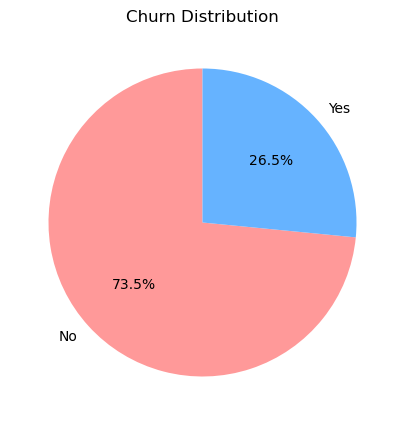

In [187]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Churn Distribution')
plt.show()

From the results of coding and visualization above, we can conclude that the data is **Imbalance** and there are no rare values / labels existing from our set treshold of 2%

### 3.2 Numerical Correlation Analysis

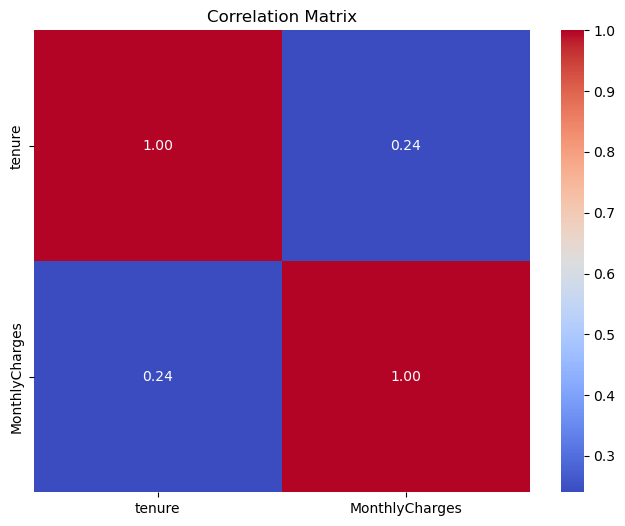

In [96]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation coefficient between `tenure` and `MonthlyCharges` is 0.24. This indicates a weak positive correlation between the two variables. In other words, as the tenure increases, there is a slight tendency for the monthly charges to increase, but this relationship is not strong.

### 3.3 Collinearity Analysis

In order to be able to find the correlation between each Category / features towards each other and towards the target `Churn` itself, we decided to create a dummy variable namely `data_encoded` for the sake of this step and using One Hot Encoder to convert the data type into numericals. This also helps to find if there are collinearity in our datasets.

In [97]:
categorical_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

data_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

data_encoded['Churn'] = data_encoded['Churn'].map({'Yes': 1, 'No': 0})

data_encoded.head()


,tenure,MonthlyCharges,Churn,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,9,72.90,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
1,14,82.65,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
2,64,47.85,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,72,69.65,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,3,23.60,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1


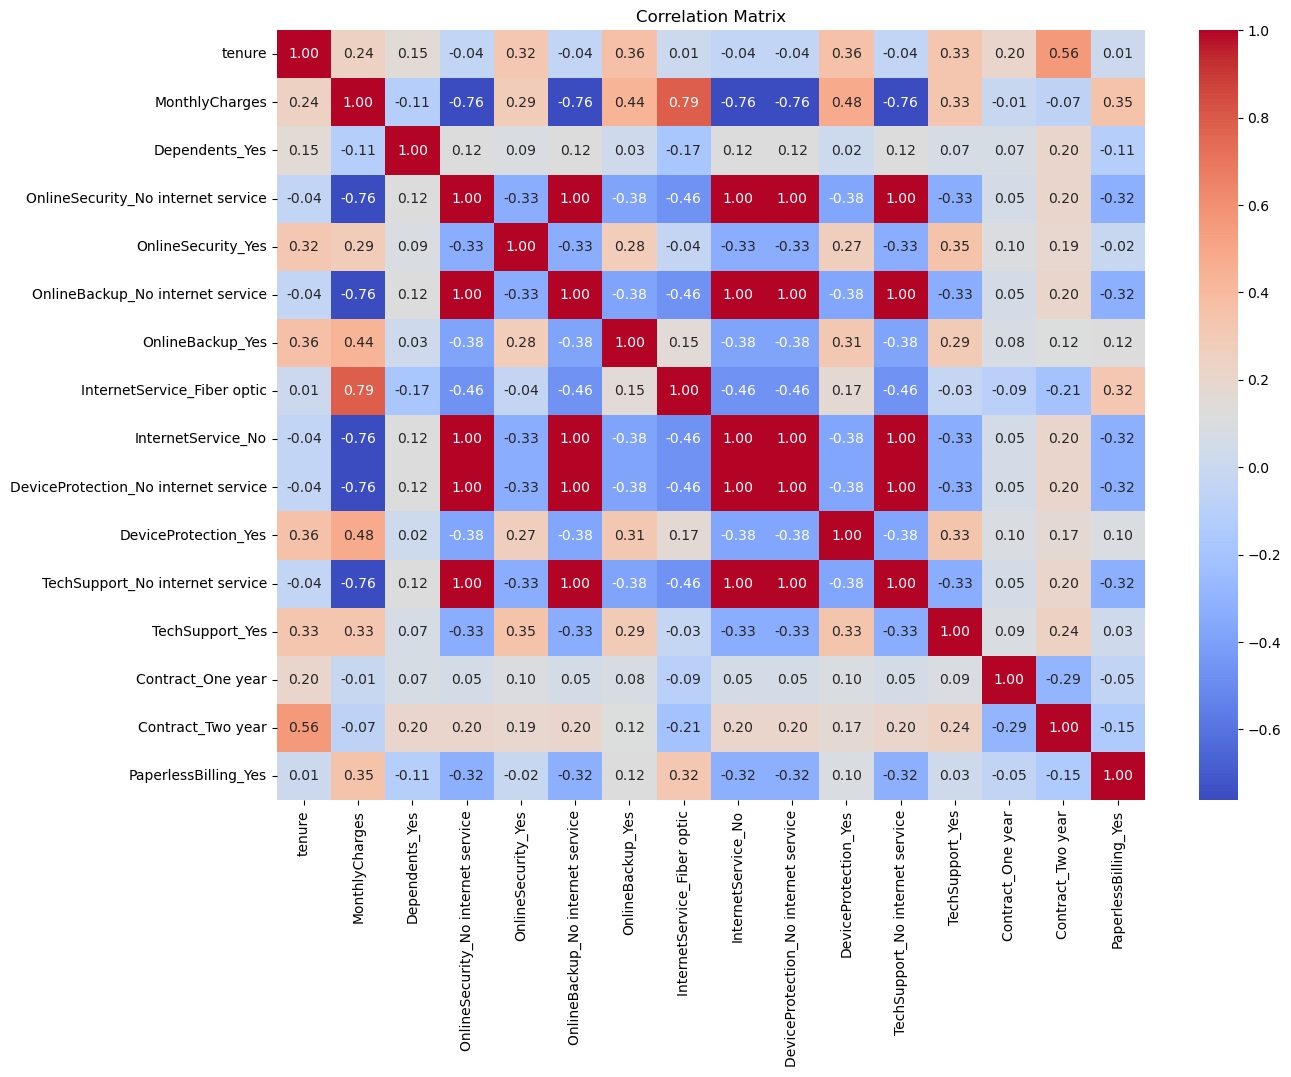

In [98]:
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation matrix shows the relationships between the features and the target variable (`Churn`). Here are some key observations:

- `tenure` has a negative correlation with Churn, indicating that customers with longer tenure are less likely to churn.
- `MonthlyCharges` has a positive correlation with Churn, suggesting that higher charges might be associated with higher churn rates.

Other features have varying degrees of correlation, but none are extremely high, which suggests **no multicollinearity** issues.

### 3.4 Test For Normality

We can use histograms and Q-Q plots to test for normality of the numerical features.

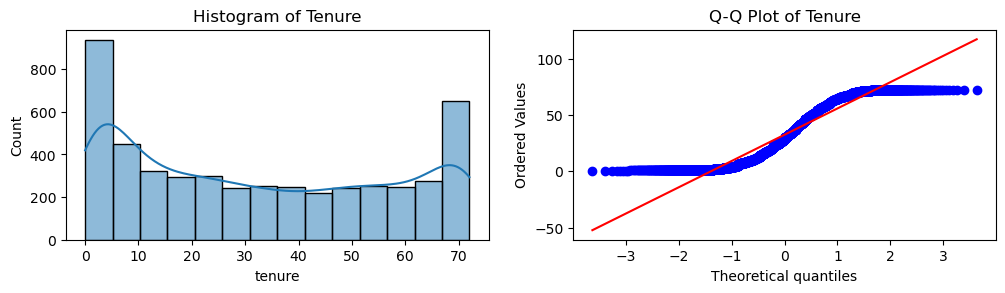

In [99]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['tenure'], kde=True)
plt.title('Histogram of Tenure')

plt.subplot(2, 2, 2)
stats.probplot(df['tenure'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Tenure')



plt.show()


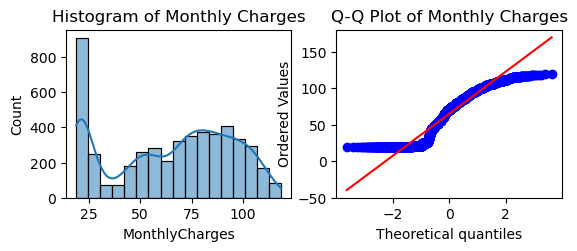

In [100]:
plt.subplot(2, 2, 3)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Histogram of Monthly Charges')

plt.subplot(2, 2, 4)
stats.probplot(df['MonthlyCharges'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Monthly Charges')

plt.show()

The histograms and Q-Q plots indicate the following:

- **Tenure:** The histogram shows a relatively uniform distribution, which is not normally distributed. The Q-Q plot further confirms this as the data points deviate significantly from the straight line.
- **Monthly Charges:** The histogram shows a somewhat skewed distribution. The Q-Q plot also indicates that the data is not perfectly normal, with deviations from the straight line.

**END OF CHAPTER 3**

****

## **4. Data Preparation and Preprocessing**

The preprocessing steps will include:

1. **Data Cleaning :** Identify and handle any missing values, duplicate values, and outliers.
2. **Feature Engineering:** Transforming raw data into a format that is suitable for the algorithms to enhance the predictive power of the model. Such as Converting categorical variables into numerical values and scaling the numerical features.
3. **Splitting the data:** Split the data into training and testing sets.

### 4.1 Data Cleaning


From **Chapter 2 : Data Understanding** It has already been proven that there are **no missing values** from the dataset. So we will skip that part and continue on duplicates and outliers

#### 4.1.1 Duplicates

In [101]:
df.duplicated().sum()

77

In [102]:
df.drop_duplicates(inplace= True)

We have successfully remove all the duplicated datas.

#### 4.1.2 Outliers

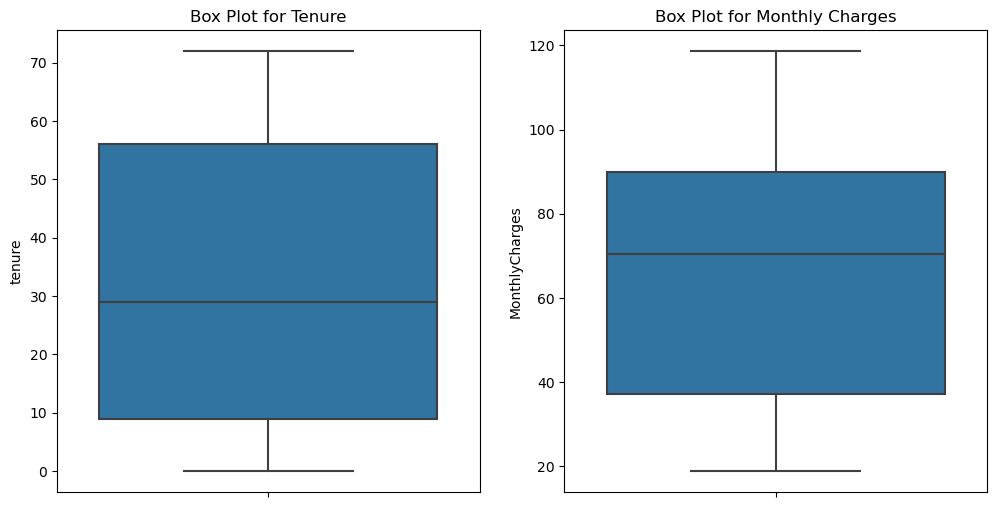

tenure            0
MonthlyCharges    0
dtype: int64

In [103]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['tenure'])
plt.title('Box Plot for Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_encoded['MonthlyCharges'])
plt.title('Box Plot for Monthly Charges')

plt.show()

Q1 = df[['tenure', 'MonthlyCharges']].quantile(0.25)
Q3 = df[['tenure', 'MonthlyCharges']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['tenure', 'MonthlyCharges']] < (Q1 - 1.5 * IQR)) | 
            (df[['tenure', 'MonthlyCharges']] > (Q3 + 1.5 * IQR)))

outliers.sum()


The box plots show that there are no significant outliers in the `tenure` and `MonthlyCharges` features, as indicated by the absence of data points outside the whiskers of the box plots.

### 4.2 Feature Engineering

**Numerical Features :** `tenure` and `MonthlyCharges` we will be using `MinMaxScaler` because it is efficient when there are no outliers in our dataset and it could defend the shape of data. `RobustScaler` is efficient whereas outliers exists, in which we do not have outliers and `StandardScaler` could not defend the shape of data because the range is nearby 0 (could be positive or negative) whereas `MinMaxScaler` is between 0 to 1.

**Categorical Features :** We will be using `OneHotEncoder` because unlike Label Encoding, which assigns a unique integer to each category, One Hot Encoding does not imply any ordinal relationship between categories. This is important for nominal categorical data where no order is implied. One Hot Encoding also allows the model to independently learn weights for each category, which can lead to better model performance for categorical data with no intrinsic ordering. While `LabelEncoder` is good for ordinal type which is not the case with our Dataset.

In [104]:
# Identify numerical and categorical columns
numerical_features = ['tenure', 'MonthlyCharges']
categorical_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Preprocessing for numerical data (Feature Scaling)
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

### 4.3 Splitting the data

In [180]:
# Separate target variable and features
X = df.drop(columns='Churn')
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Make binary for Churn

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# We use test size 10:90 for better analysis. It does give more risk for overfitting, but it is still manageable
pd.DataFrame(X,y)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
Churn,,,,,,,,,,
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
...,...,...,...,...,...,...,...,...,...,...
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90


In [212]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4367, 10), (486, 10), (4367,), (486,))

**END OF CHAPTER 4**

****

## **5. Modelling Experiments**

This chapter will deeply analyze and tests a few models to finally find our most optimal and ideal model for Classification Prediction purposes. Below are the workflow as follows :

1. **Model Evaluation Weight:** This section will discuss about which score we should focus at the most and the underlying reason of why regarding its business purposes
2. **Model Benchmarking (K-Fold):** Test models default benchmark with K-fold to see ROC AUC, F2 and each Standard Deviation
3. **Model Benchmarking (Data Test):** Test models with dataset to narrow down the choices of ideal model
4. **Resampling Model:** Using Oversampling methods to balance the imbalance dataset from ideal model contenders to get better output
5. **Hyperparameter Tuning and Ensemble:** Hyper Tune the resampled model contenders and Ensemble stand alones to get even better output
6. **Report and Confusion Metric:** Classification Report and Confusion Metric for our Final Model to show its impact towards our business problem statement

### 5.1 Model Evaluation Weight

For classification model evaluation, there are several metrics to consider, but which one we should focus on the most depends on the specific context of our problem and what matters most to us or our stakeholders.


Previously on **Chapter 1** we have discussed about the business understanding and the simulations of Type Errors. Below is the brief recap of results :

**Type 1 Error Simulation (False Positive)** : $173.5 Loss per Customer

**Type 2 Error Simulation (False Negative)** : $764 Loss per Customer

Based on the consequences, our goal is to develop a model that can effectively reduce customer churn for the company, particularly by minimizing the number of false negatives (customers who actually churn but are predicted not to churn).
Since the weight of loss of **False Negative** is much bigger than False Positive, it is best advised that we should focus the most towards `Recall` and `F2 Score`. This doesn't mean that we completely neglect other evaluations score, but those 2 will be our priority.

In [107]:
# F2 score coding formula
f2_score = make_scorer(fbeta_score, beta=2)

The F-beta score reaches its best value at 1 and worst at 0. Higher values of beta weight recall more strongly, while lower values weight precision more strongly. That is why we use F2 instead of F1, because we values `Recall` more than `Precision`

### 5.2 Model Benchmarking (K-Fold)

This code evaluates multiple machine learning models on a given dataset using stratified cross-validation. It uses several classifiers and evaluates them based on the ROC AUC score and the F2 score. The results are then compiled into a DataFrame for easy comparison.

**Cross-Validation**

1. **Stratified K-Fold Cross-Validation**: This ensures that each fold has the same proportion of class labels, which is important for imbalanced datasets.
2. **Imbalanced Pipeline**: An imbalanced-learn pipeline `ImbPipeline` is created with the preprocessing step and the current model.
3. **Cross-Validation**: The `cross_validate` function evaluates the model using the pipeline and the stratified folds, scoring based on ROC AUC and F2 score. The results are stored in the lists.

**What This Code Achieves**
- **Comparative Analysis**: It allows you to compare multiple models based on their performance metrics.
- **Model Selection**: Helps in selecting the best model based on the F2 score, which emphasizes recall more than precision (useful for imbalanced datasets).
- **Cross-Validation**: Provides a robust evaluation by using stratified K-fold cross-validation, ensuring that performance estimates are reliable and not biased due to data splitting.


In [108]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier


logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)  # Enable probability estimates for SVM
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42,verbose=-100)
qda = QuadraticDiscriminantAnalysis()
nb = GaussianNB()

models = [logreg, knn, dt, rf, xgb, lgbm, gb, svm, qda, nb]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'SVM', 'QDA', 'Naive Bayes']

roc_auc_scores = []
f2_scores = []
mean_roc_aucs = []
mean_f2s = []
std_roc_aucs = []
std_f2s = []

# Custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate each model using StratifiedKFold cross-validation
for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = ImbPipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    scores = cross_validate(estimator, X_train, y_train, cv=skfold, scoring={'roc_auc': 'roc_auc', 'f2': f2_scorer})
    roc_auc_scores.append(scores['test_roc_auc'])
    f2_scores.append(scores['test_f2'])
    mean_roc_aucs.append(scores['test_roc_auc'].mean())
    mean_f2s.append(scores['test_f2'].mean())
    std_roc_aucs.append(scores['test_roc_auc'].std())
    std_f2s.append(scores['test_f2'].std())

results_df_kfold = pd.DataFrame({
    'Model': model_names,
    'Mean ROC AUC': mean_roc_aucs,
    'ROC AUC Std Dev': std_roc_aucs,
    'Mean F2 Score': mean_f2s,
    'F2 Score Std Dev': std_f2s
})

# Sort the results by mean F2 Score in descending order
results_df_sorted_kfold = results_df_kfold.set_index('Model').sort_values(by='Mean F2 Score', ascending=False)

results_df_sorted_kfold


,Mean ROC AUC,ROC AUC Std Dev,Mean F2 Score,F2 Score Std Dev
Model,,,,
Naive Bayes,0.818114,0.020804,0.723630,0.021633
Logistic Regression,0.839162,0.019680,0.541898,0.027184
Gradient Boosting,0.837491,0.020364,0.529443,0.028968
QDA,0.582447,0.068996,0.519918,0.086140
LightGBM,0.822266,0.019209,0.517149,0.014365
XGBoost,0.812819,0.016351,0.514059,0.018266
KNN,0.779247,0.017049,0.492921,0.014791
SVM,0.786382,0.016990,0.489919,0.019215
Decision Tree,0.652044,0.008629,0.478786,0.013262


From the perspective of default Hyperparameter, **Naive Bayes** won the comparations from `F2` score. And the trade-off between its `ROC AUC` with others are not that significant. Now let's give data test and see if **Naive Bayes** still holds the best `F2` out of all

### 5.3 Model Benchmarking (Data Test)

This code trains each pipeline, evaluates its performance, and determines the best model based on the F2 score. This code performs similar tasks to the previous one but with some differences. Below are the difference compares to the previous code:

- **Cross-Validation**: The previous code uses stratified K-fold cross-validation to evaluate models, while the current code splits the data into a single training and test set.
- **Evaluation Function**: The current code uses a function `train_and_evaluate` to encapsulate the training and evaluation logic for each model, while the previous code uses `cross_validate`.

**Summary**
- The current code is more streamlined and focuses on evaluating models on a single train/test split using pipelines, which include preprocessing steps. It does not use cross-validation, making it potentially faster but less robust compared to the previous code.
- The previous code is more rigorous with cross-validation, providing more reliable performance estimates but at the cost of increased computational time.



In [109]:
def train_and_evaluate(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate F2 score
    f2 = fbeta_score(y_test, y_pred, beta=2)
    
    # Calculate ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"  # Some models might not have predict_proba method
    
    print(f"{model_name} Report:\n", report)
    print(f"F2 Score: {f2}")
    print(f"ROC AUC Score: {roc_auc}")
    
    return model_name, accuracy, report, f2, roc_auc

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),  # Enable probability estimates for SVM
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-100),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    result = train_and_evaluate(model, model_name)
    results.append(result)

# Determine the best model based on F2
best_model_traintest = max(results, key=lambda item: item[3])
best_model_name, best_model_accuracy, best_model_report, best_model_f2, best_model_roc_auc = best_model_traintest

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy}")
print(f"Classification Report:\n{best_model_report}")
print(f"F2 Score: {best_model_f2}")
print(f"ROC AUC Score: {best_model_roc_auc}")


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       345
           1       0.68      0.45      0.54       141

    accuracy                           0.78       486
   macro avg       0.74      0.68      0.70       486
weighted avg       0.77      0.78      0.76       486

F2 Score: 0.48632218844984804
ROC AUC Score: 0.8511152225305787
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       345
           1       0.54      0.54      0.54       141

    accuracy                           0.73       486
   macro avg       0.68      0.68      0.68       486
weighted avg       0.73      0.73      0.73       486

F2 Score: 0.5397727272727273
ROC AUC Score: 0.6876349059512797
Random Forest Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       345
           1       0.62      0.49  

In [110]:
columns = ["Model", "Accuracy", "Classification Report", "F2 Score", "ROC AUC Score"]
df_results_bmtraintest = pd.DataFrame(results, columns=columns)

best_model_traintest = df_results_bmtraintest[df_results_bmtraintest['F2 Score'] == df_results_bmtraintest['F2 Score'].max()]
print("\nBest Model based on F2 Score:")
print(best_model_traintest)

df_sorted_bmtraintest = df_results_bmtraintest.drop(columns='Classification Report').sort_values(by='F2 Score', ascending=False)
df_sorted_bmtraintest



Best Model based on F2 Score:
         Model  Accuracy                              Classification Report  \
9  Naive Bayes  0.746914                precision    recall  f1-score   ...   

   F2 Score  ROC AUC Score  
9  0.740979       0.820979  


,Model,Accuracy,F2 Score,ROC AUC Score
9,Naive Bayes,0.746914,0.740979,0.820979
8,QDA,0.378601,0.621762,0.518286
6,LightGBM,0.783951,0.547337,0.844845
1,Decision Tree,0.734568,0.539773,0.687635
5,XGBoost,0.783951,0.523952,0.841340
2,Random Forest,0.765432,0.511111,0.824956
7,K-Nearest Neighbors,0.781893,0.499244,0.786628
0,Logistic Regression,0.779835,0.486322,0.851115
4,Gradient Boosting,0.767490,0.463526,0.851619
3,SVM,0.775720,0.428349,0.770367


Again, **Naive Bayes** is the ideal model in terms of `F2 Score` which is crucial for our business problem since our `False Negative` has **5x bigger** impact than `False Positive`. Also, the `ROC AUC` score at 82% reflects that it is optimal and sufficient for differentiating and recognizing between classes.
The trade-off with other models in terms of other scores is not that consequential.

This brings us to the point where we will be using **Naive Bayes** as our current ideal default model.

NOTE : We need to remember that **Naive Bayes** itself is a standalone (Interpretable AI) and not a form of ensemble such as **XGBoost** and **LightGBM** (Explainable AI). This could mean, even if currently **Naive Bayes** is the optimal model, it does not end there. Because we cannot Hyperparameter Tune **Naive Bayes** and must ensemble it with stacking classifiers or make voting classifier, whilst models that is already an ensemble itself could be Hyperparameter Tuned by default.

### 5.4 Resampling Model 

#### 5.4.1 Default

We will try both representative from each of the best standalone and "ensemble by default" model for the sake of workflow and efficiency. Which is **Naive Bayes** and **LightGBM** from our reports so far.

##### **Light GBM Default**

In [111]:
# Initialize the model with default parameters
model_lgbm = LGBMClassifier(random_state=42,verbose=-100)

clf_lgbm_default = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_lgbm)
])

clf_lgbm_default.fit(X_train, y_train)

y_pred_lgbm_default = clf_lgbm_default.predict(X_test)
y_prob__lgbm_default = clf_lgbm_default.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbm_default))

f2 = fbeta_score(y_test, y_pred_lgbm_default, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob__lgbm_default)
print(f"ROC AUC: {roc_auc}")


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       345
           1       0.66      0.52      0.58       141

    accuracy                           0.78       486
   macro avg       0.74      0.71      0.72       486
weighted avg       0.77      0.78      0.78       486

F2 Score: 0.5473372781065089
ROC AUC: 0.8448453078425328


##### **Naive Bayes Default**

In [182]:
model_nb = GaussianNB()

clf_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_nb)
])

clf_nb.fit(X_train, y_train)

y_pred_nb_default = clf_nb.predict(X_test)
y_prob_nb_default = clf_nb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_nb_default))

f2_nb = fbeta_score(y_test, y_pred_nb_default, beta=2)
print(f"F2 Score: {f2_nb}")

roc_auc_nb = roc_auc_score(y_test, y_prob_nb_default)
print(f"ROC AUC: {roc_auc_nb}")


              precision    recall  f1-score   support

           0       0.91      0.72      0.80       345
           1       0.54      0.82      0.65       141

    accuracy                           0.75       486
   macro avg       0.72      0.77      0.73       486
weighted avg       0.80      0.75      0.76       486

F2 Score: 0.740979381443299
ROC AUC: 0.8209785178332819


From the classification report above, we can see the imbalance of all results between both classes on **LightGBM**, while for **Naive Bayes** it has imbalance between classes for `precision` and `F1`. This is why Resampling is important in handling such imbalance dataset. `Oversampling` is a good choice towards minority class and `Undersampling` for majority class. Although in most cases, it is prefered to use `Oversampling` on minority instead of `Undersampling` the majority class. Because the latter is usually only used with big data points.

**source :** https://stackoverflow.com/questions/44244711/imbalanced-data-undersampling-or-oversampling

#### 5.4.2 Resampling

Since our data is **Imbalance** we will try to `Oversample` our dataset with a few resampling techniques namely `SMOTE`, `ADASYN`, and `SMOTEEN`.
Once done, we will compare all of them to the default without resampling and pick the best option out of them considering classification of `Recall` and `F2` as our main priority

##### **NAIVE BAYES**

In [113]:
model_nb = GaussianNB()

# Resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

def evaluate_model(resampler_name, resampler):
    clf = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', resampler),
        ('classifier', model_nb)
    ])

    clf.fit(X_train, y_train)
    y_pred_nb_resample = clf.predict(X_test)
    y_prob_nb_resample = clf.predict_proba(X_test)[:, 1]

    f2 = fbeta_score(y_test, y_pred_nb_resample, beta=2)
    roc_auc = roc_auc_score(y_test, y_prob_nb_resample)

    print(f"{resampler_name} Resampling")
    print(classification_report(y_test, y_pred_nb_resample))
    print(f"F2 Score: {f2}")
    print(f"ROC AUC: {roc_auc}")

    return resampler_name, f2, roc_auc

# Evaluate models with different resampling methods
results = []
for name, resampler in resampling_methods.items():
    result = evaluate_model(name, resampler)
    results.append(result)

results_df_nb_resample = pd.DataFrame(results, columns=['Resampling Method', 'F2 Score', 'ROC AUC'])
results_df_sorted_nb_resample = results_df_nb_resample.sort_values(by='F2 Score', ascending=False)

results_df_sorted_nb_resample


ADASYN Resampling
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       345
           1       0.52      0.83      0.64       141

    accuracy                           0.73       486
   macro avg       0.71      0.76      0.71       486
weighted avg       0.80      0.73      0.74       486

F2 Score: 0.7414448669201521
ROC AUC: 0.8228492136910268
SMOTE Resampling
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       345
           1       0.54      0.82      0.65       141

    accuracy                           0.74       486
   macro avg       0.72      0.76      0.72       486
weighted avg       0.80      0.74      0.75       486

F2 Score: 0.7390745501285347
ROC AUC: 0.8213279884880255
SMOTEENN Resampling
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       345
           1       0.55      0.80      0.65       141

    accuracy 

,Resampling Method,F2 Score,ROC AUC
0,ADASYN,0.741445,0.822849
1,SMOTE,0.739075,0.821328
2,SMOTEENN,0.733766,0.826693


For **Naive Bayes**, `ADASYN` is the best Resampling method compared to others

##### **LIGHT GBM**

In [114]:
# We change class weight param to Balanced
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

def evaluate_model(resampler_name, resampler):
    clf = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', resampler),
        ('classifier', model_lgbm)
    ])

    clf.fit(X_train, y_train)
    y_pred_lgbm_resample = clf.predict(X_test)
    y_prob_lgbm_resample = clf.predict_proba(X_test)[:, 1]

    f2 = fbeta_score(y_test, y_pred_lgbm_resample, beta=2)
    roc_auc = roc_auc_score(y_test, y_prob_lgbm_resample)

    print(f"{resampler_name} Resampling")
    print(classification_report(y_test, y_pred_lgbm_resample))
    print(f"F2 Score: {f2}")
    print(f"ROC AUC: {roc_auc}")

    return resampler_name, f2, roc_auc

# Evaluate models with different resampling methods
results = []
for name, resampler in resampling_methods.items():
    result = evaluate_model(name, resampler)
    results.append(result)

results_df_lgbm_resample = pd.DataFrame(results, columns=['Resampling Method', 'F2 Score', 'ROC AUC'])
results_df_sorted_lgbm_resample = results_df_lgbm_resample.sort_values(by='F2 Score', ascending=False)

print("\nComparison of Resampling Methods:")
results_df_sorted_lgbm_resample


ADASYN Resampling
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       345
           1       0.64      0.72      0.67       141

    accuracy                           0.80       486
   macro avg       0.76      0.77      0.76       486
weighted avg       0.81      0.80      0.80       486

F2 Score: 0.6984785615491009
ROC AUC: 0.8531503751670264
SMOTE Resampling
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       345
           1       0.61      0.66      0.63       141

    accuracy                           0.78       486
   macro avg       0.73      0.74      0.74       486
weighted avg       0.78      0.78      0.78       486

F2 Score: 0.6485355648535565
ROC AUC: 0.8527083975742624
SMOTEENN Resampling
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       345
           1       0.60      0.73      0.66       141

    accuracy 

,Resampling Method,F2 Score,ROC AUC
2,SMOTEENN,0.700680,0.860171
0,ADASYN,0.698479,0.853150
1,SMOTE,0.648536,0.852708


There are significant improvement when applying `Oversampling` on **LightGBM** in terms of `F2` score. While for **Naive Bayes** is almost no difference. The reason for this in **Naive Bayes** coulde be because of its disadvantages [source1](https://stats.stackexchange.com/questions/399722/why-naive-bayes-classifier-is-known-to-be-a-bad-estimator#:~:text=In%20scikit%2Dlearn%20documentation%20page,to%20be%20taken%20too%20seriously) [source2](https://uc-r.github.io/naive_bayes#:~:text=The%20greatest%20weakness%20of%20the,this%20algorithm%20works%20surprisingly%20well)

Now Let us experiment even further by modifying the basic pipeline on numerical scaler. Let's try with the rest of scaler namely `StandardScaler` and `RobustScaler` for **LightGBM** with `SMOTEENN` as the best resample method

##### **Scaler Experiment**

In [115]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Preprocessing for numerical data using StandardScaler
numerical_transformer_standard = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for numerical data using RobustScaler
numerical_transformer_robust = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Combine preprocessing steps with StandardScaler
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_standard, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Combine preprocessing steps with RobustScaler
preprocessor_robust = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_robust, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Create the pipeline with SMOTEENN using StandardScaler
clf_lgbm_smoteenn_standard = ImbPipeline(steps=[
    ('preprocessor', preprocessor_standard),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', model_lgbm)
])

# Create the pipeline with SMOTEENN using RobustScaler
clf_lgbm_smoteenn_robust = ImbPipeline(steps=[
    ('preprocessor', preprocessor_robust),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', model_lgbm)
])

# Fit and evaluate the model using StandardScaler
clf_lgbm_smoteenn_standard.fit(X_train, y_train)
y_pred_smoteenn_standard = clf_lgbm_smoteenn_standard.predict(X_test)
y_prob_smoteenn_standard = clf_lgbm_smoteenn_standard.predict_proba(X_test)[:, 1]
report_standard = classification_report(y_test, y_pred_smoteenn_standard, output_dict=True)
f2_smoteenn_standard = fbeta_score(y_test, y_pred_smoteenn_standard, beta=2)
roc_auc_smoteenn_standard = roc_auc_score(y_test, y_prob_smoteenn_standard)

# Fit and evaluate the model using RobustScaler
clf_lgbm_smoteenn_robust.fit(X_train, y_train)
y_pred_smoteenn_robust = clf_lgbm_smoteenn_robust.predict(X_test)
y_prob_smoteenn_robust = clf_lgbm_smoteenn_robust.predict_proba(X_test)[:, 1]
report_robust = classification_report(y_test, y_pred_smoteenn_robust, output_dict=True)
f2_smoteenn_robust = fbeta_score(y_test, y_pred_smoteenn_robust, beta=2)
roc_auc_smoteenn_robust = roc_auc_score(y_test, y_prob_smoteenn_robust)

# Preprocessing for numerical data using MinMaxScaler
numerical_transformer_minmax = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Combine preprocessing steps with MinMaxScaler
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_minmax, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Create the pipeline with SMOTEENN using MinMaxScaler
clf_lgbm_smoteenn_minmax = ImbPipeline(steps=[
    ('preprocessor', preprocessor_minmax),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', model_lgbm)
])

# Fit and evaluate the model using MinMaxScaler
clf_lgbm_smoteenn_minmax.fit(X_train, y_train)
y_pred_smoteenn_minmax = clf_lgbm_smoteenn_minmax.predict(X_test)
y_prob_smoteenn_minmax = clf_lgbm_smoteenn_minmax.predict_proba(X_test)[:, 1]
report_minmax = classification_report(y_test, y_pred_smoteenn_minmax, output_dict=True)
f2_smoteenn_minmax = fbeta_score(y_test, y_pred_smoteenn_minmax, beta=2)
roc_auc_smoteenn_minmax = roc_auc_score(y_test, y_prob_smoteenn_minmax)

# Create a DataFrame to display the results
results_df_scalercompare = pd.DataFrame({
    'Metric': ['F2 Score', 'ROC AUC', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)'],
    'StandardScaler': [f2_smoteenn_standard, roc_auc_smoteenn_standard, 
                       report_standard['1']['precision'], report_standard['1']['recall'], report_standard['1']['f1-score']],
    'RobustScaler': [f2_smoteenn_robust, roc_auc_smoteenn_robust, 
                     report_robust['1']['precision'], report_robust['1']['recall'], report_robust['1']['f1-score']],
    'MinMaxScaler': [f2_smoteenn_minmax, roc_auc_smoteenn_minmax, 
                              report_minmax['1']['precision'], report_minmax['1']['recall'], report_minmax['1']['f1-score']]
})

results_df_scalercompare


,Metric,StandardScaler,RobustScaler,MinMaxScaler
0,F2 Score,0.703654,0.688950,0.700680
1,ROC AUC,0.853356,0.856645,0.860171
2,Precision (Class 1),0.594286,0.597633,0.602339
3,Recall (Class 1),0.737589,0.716312,0.730496
4,F1-Score (Class 1),0.658228,0.651613,0.660256


Apparently, our first choice `MinMaxScaler` was the most optimal one in the first place. 
Now that we have done the resample test with different techniques and pipelines, let's sum things up below.

#### 5.4.3 Resampling Conclusion

From here, we can conclude that :

1. **LightGBM** got the best result from using `SMOTEENN` oversampling method
2. **Naive Bayes** got the best result from using `ADASYN` oversampling method
3. Both are already at best with `MinMaxScaler` as the numerical scaler in Preprocessing steps

### 5.5 Hyperparameter Tuning and Ensemble

In this section, we will apply Hyperparameter Tuning for **LightGBM** with `GridSearchCV` and Ensemble methods for **Naive Bayes** to see which result would give best classification report. Although for good measure, we will not just rely on one Oversampling method even though it has already been decided from the previous section. 

#### **LIGHT GBM (SMOTE)**

In [183]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100) 

clf_s = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), 
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
} 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

f2_scorer = make_scorer(fbeta_score, beta=2) 

grid_search = GridSearchCV(clf_s, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2) 
grid_search.fit(X_train, y_train)

best_model_lgbms = grid_search.best_estimator_
y_pred_lgbms = best_model_lgbms.predict(X_test)
y_prob_lgbms = best_model_lgbms.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbms))

f2 = fbeta_score(y_test, y_pred_lgbms, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbms)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       345
           1       0.62      0.77      0.69       141

    accuracy                           0.80       486
   macro avg       0.76      0.79      0.77       486
weighted avg       0.81      0.80      0.80       486

F2 Score: 0.7317073170731707
ROC AUC: 0.8625141330044197


#### **LIGHT GBM (SMOTEENN)**

In [184]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100) 

clf_snn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)), 
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
} 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

f2_scorer = make_scorer(fbeta_score, beta=2) 

grid_search = GridSearchCV(clf_snn, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2) 
grid_search.fit(X_train, y_train)

best_model_lgbmsnn = grid_search.best_estimator_
y_pred_lgbmsnn = best_model_lgbmsnn.predict(X_test)
y_prob_lgbmsnn = best_model_lgbmsnn.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbmsnn))

f2 = fbeta_score(y_test, y_pred_lgbmsnn, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmsnn)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


              precision    recall  f1-score   support

           0       0.89      0.79      0.84       345
           1       0.59      0.77      0.67       141

    accuracy                           0.78       486
   macro avg       0.74      0.78      0.75       486
weighted avg       0.80      0.78      0.79       486

F2 Score: 0.7238605898123325
ROC AUC: 0.8509096515572001


#### **LIGHT GBM (ADASYN)**

In [116]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100) 

clf_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)), 
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
} 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

f2_scorer = make_scorer(fbeta_score, beta=2) 

grid_search = GridSearchCV(clf_ada, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2) 
grid_search.fit(X_train, y_train)

best_model_lgbmada = grid_search.best_estimator_
y_pred_lgbmada = best_model_lgbmada.predict(X_test)
y_prob_lgbmada = best_model_lgbmada.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbmada))

f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       345
           1       0.61      0.82      0.70       141

    accuracy                           0.79       486
   macro avg       0.76      0.80      0.77       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7636122177954847
ROC AUC: 0.8652996196936992


From here we can conclude that even **LightGBM** has the best `F2` score with resampling using `SMOTEENN`, but once hyperparameter tuning is combined, the reports shows best at using `ADASYN` instead. With overall accuracy of 79% and F2 score at 76% 

Now let's check for **Naive Bayes** and try ensemble method

#### **Naive Bayes (Stacking Classifier)**

In [160]:
# Define base models
base_models = [
    ('logreg', logreg),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('lgbm', lgbm),
    ('nb', nb)
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create a Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Create the pipeline with ADASYN and the Stacking Classifier
clf_stacking = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', stacking_model)
])

cv_scores_stacking = cross_val_score(clf_stacking, X_train, y_train, cv=cv, scoring=f2_scorer, n_jobs=-1)

# Train the stacking model
clf_stacking.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = clf_stacking.predict(X_test)
y_prob_stacking = clf_stacking.predict_proba(X_test)[:, 1]

print("Stacking Model Report:\n", classification_report(y_test, y_pred_stacking))

f2_stacking = fbeta_score(y_test, y_pred_stacking, beta=2)
print(f"F2 Score: {f2_stacking}")

roc_auc_stacking = roc_auc_score(y_test, y_prob_stacking)
print(f"ROC AUC: {roc_auc_stacking}")


Stacking Model Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       345
           1       0.63      0.68      0.66       141

    accuracy                           0.79       486
   macro avg       0.75      0.76      0.75       486
weighted avg       0.80      0.79      0.79       486

F2 Score: 0.6703910614525139
ROC AUC: 0.851505807379998


#### **Ensemble Voting Classifier**

In [290]:
# Define models to include in the ensemble
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)  # Enable probability estimates for SVM
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42,verbose=-100)
nb = GaussianNB()

# Create a Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('nb', nb)
], voting='soft')  # Use 'soft' voting to average probabilities

# Create the pipeline with ADASYN and the Voting Classifier
clf_ensemble = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', ensemble_model)
])

f2_scorer = make_scorer(fbeta_score, beta=2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf_ensemble, X_train, y_train, cv=cv, scoring=f2_scorer, n_jobs=-1)

# Train the ensemble model
clf_ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = clf_ensemble.predict(X_test)
y_prob_ensemble = clf_ensemble.predict_proba(X_test)[:, 1]

print("Ensemble Model Report:\n", classification_report(y_test, y_pred_ensemble))

f2_ensemble = fbeta_score(y_test, y_pred_ensemble, beta=2)
print(f"F2 Score: {f2_ensemble}")

roc_auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)
print(f"ROC AUC: {roc_auc_ensemble}")


Ensemble Model Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       345
           1       0.59      0.74      0.65       141

    accuracy                           0.77       486
   macro avg       0.73      0.76      0.74       486
weighted avg       0.80      0.77      0.78       486

F2 Score: 0.7017543859649122
ROC AUC: 0.8626271970397781


#### **Other Experimental (XGboost with SMOTE)**

In [162]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

clf_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])


param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search_xgb = GridSearchCV(clf_xgb, param_grid_xgb, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2)
grid_search_xgb.fit(X_train, y_train)

best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
y_prob_xgb = best_model_xgb.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

f2_xgb = fbeta_score(y_test, y_pred_xgb, beta=2)
print(f"XGBoost F2 Score: {f2_xgb}")

roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost ROC AUC: {roc_auc_xgb}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       345
           1       0.57      0.79      0.67       141

    accuracy                           0.77       486
   macro avg       0.74      0.78      0.75       486
weighted avg       0.81      0.77      0.78       486

XGBoost F2 Score: 0.7378129117259552
XGBoost ROC AUC: 0.8535204029191079


Nothing much comes out from ensembling with a few different methods using **Naive Bayes**. And even Hyperparameter Tuning **XGBoost** shows even worse F2 Score. This concludes that **Hyperparameter Tuned and ADASYN oversampled LightGBM** as the winner model.

### 5.6 Report and Confusion Metric :

Below is the report and confusion metric for our final model :

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       345
           1       0.61      0.82      0.70       141

    accuracy                           0.79       486
   macro avg       0.76      0.80      0.77       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7636122177954847
ROC AUC: 0.8652996196936992
[[271  74]
 [ 26 115]]


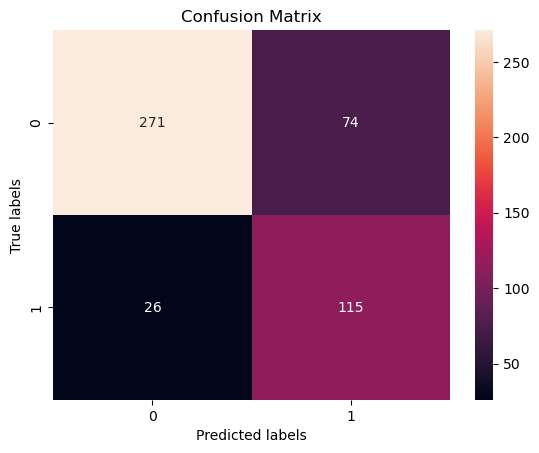

In [160]:
print(classification_report(y_test, y_pred_lgbmada))

f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")

cmlgbmada = confusion_matrix(y_test, y_pred_lgbmada)
print(cmlgbmada)

ax= plt.subplot()
sns.heatmap(cmlgbmada, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');



Confusion Matrix:

|              | Predicted Negative | Predicted Positive |
|--------------|--------------------|--------------------|
| Actual Negative |         271        |         74         |
| Actual Positive |          26        |        115         |


1. **Loss due to False Positives (Type 1 Error):**
   - False Positives (FP) = 74
   - Loss Type 1 = FP * Cost per False Positive
   - Loss Type 1 = 74 * $173.5 = $12,829

2. **Loss due to False Negatives (Type 2 Error):**
   - False Negatives (FN) = 26
   - Loss Type 2 = FN * Cost per False Negative
   - Loss Type 2 = 26 * $764 = $19,864

3. **Total Loss:**
   - Total Loss = Loss Type 1 + Loss Type 2
   - Total Loss = $12,829 + $19,864 = $32,693

**False Negative Rate:**
FNR = 26 / 26 + 115 = 18.4 %

So, the company's total loss from the given confusion matrix is **$32,693** with  **18.4 % FNR**


In [118]:
# Print the final model's pipeline steps (before evaluation)
print("Final Model Pipeline Steps:")
print(best_model_lgbmada)


Final Model Pipeline Steps:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                      

**END OF CHAPTER 5**

****

## **6. Final Model Evaluation**

1. **Calibration :** Calibrating the Final Model for its reliability and compare the result between non calibrated and calibrated version
2. **Discriminant Threshold Curve :** a plotline and its analysis regarding which Threshold is best for our Final Model and whether it is more useful for our final model or not
3. **Recursive Feature Elimination :** a plotline that gives insight about removing features from a model and select those that contributes the most
4. **Learning Curves and Standard Deviations :** a plotline and its analysis to determine whether our final model has overfitting, underfitting or variances
5. **Time Complexity :** an analysis how fast or slow our Final Model works
6. **Predict Unseen Data and Validation Sets :** This section will do test on the Unseen Data and Validation sets to see how good or bad our final model works towards it rather just the seen data
7. **Feature Importances :** This section will show what are the most important features that influenced our Final Model
8. **About Our Final Model :** This will discuss about how our Final Model works and its pipeline



### 6.1 Calibration

Calibration adjusts the predicted probabilities of a classifier to better reflect the true probabilities. This is important for applications where accurate probability estimates are crucial.

#### 6.1.1 Before Calibration

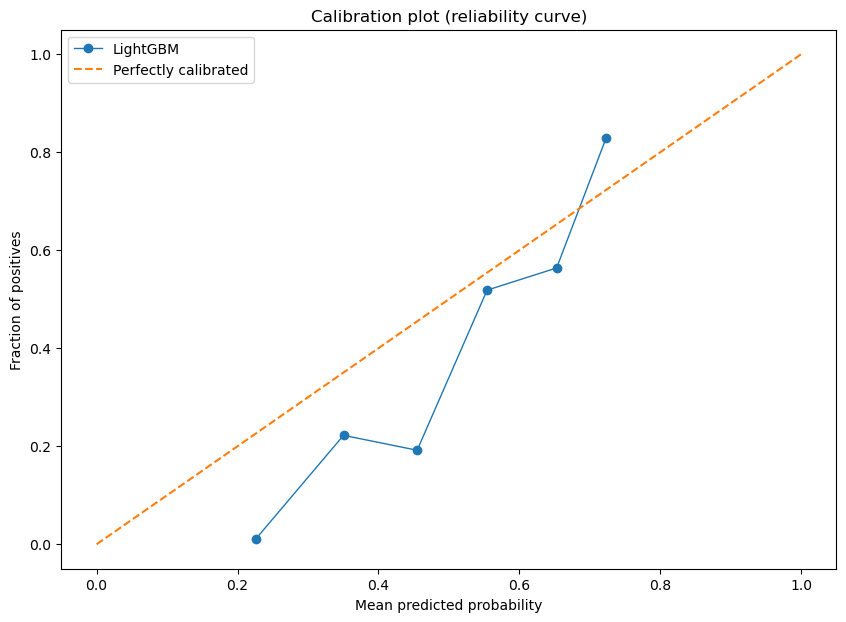

In [119]:
# Generate the calibration curve data
prob_true, prob_pred = calibration_curve(y_test, y_prob_lgbmada, n_bins=10)

plt.figure(figsize=(10, 7))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='LightGBM')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot (reliability curve)')
plt.legend()
plt.show()


#### 6.1.2 After Calibration

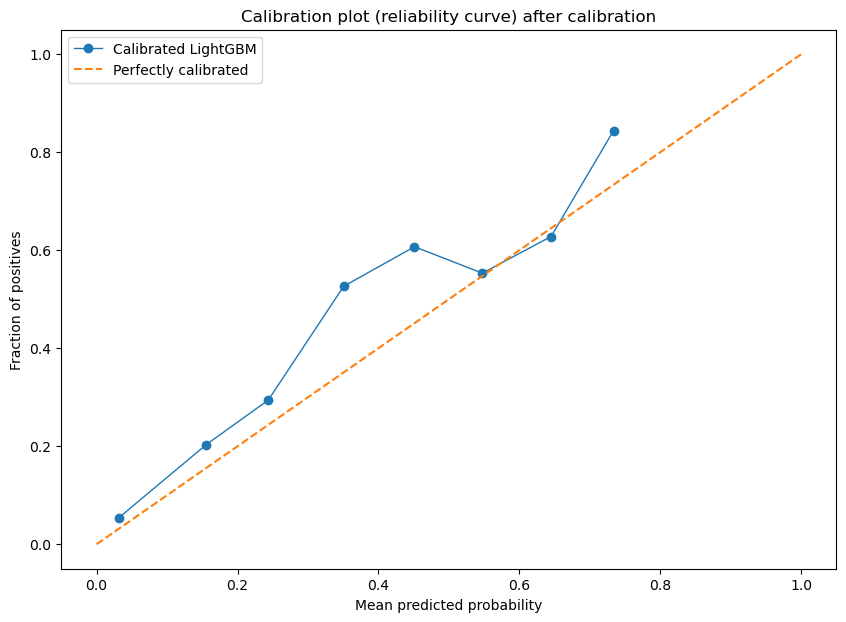

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       345
           1       0.66      0.57      0.61       141

    accuracy                           0.79       486
   macro avg       0.74      0.72      0.73       486
weighted avg       0.78      0.79      0.78       486

F2 Score: 0.5830903790087464
ROC AUC: 0.8652996196936992


In [120]:
# Calibrate the model using Platt Scaling
best_model_lgbmada_cal = CalibratedClassifierCV(best_model_lgbmada, method='sigmoid', cv='prefit')
best_model_lgbmada_cal.fit(X_train, y_train)

# Generate new predicted probabilities
y_prob_calibrated = best_model_lgbmada_cal.predict_proba(X_test)[:, 1]

prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_prob_calibrated, n_bins=10)

plt.figure(figsize=(10, 7))
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', linewidth=1, label='Calibrated LightGBM')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot (reliability curve) after calibration')
plt.legend()
plt.show()

# Make predictions with the model
y_pred_lgbmadacal = best_model_lgbmada_cal.predict(X_test)
y_prob_lgbmadacal = best_model_lgbmada_cal.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbmadacal))
f2 = fbeta_score(y_test, y_pred_lgbmadacal, beta=2)
print(f"F2 Score: {f2}")
roc_auc = roc_auc_score(y_test, y_prob_lgbmadacal)
print(f"ROC AUC: {roc_auc}")


**Comparations to Non-Calibrated Final Model Report**

In [121]:
print(classification_report(y_test, y_pred_lgbmada))
f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")
roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       345
           1       0.61      0.82      0.70       141

    accuracy                           0.79       486
   macro avg       0.76      0.80      0.77       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7636122177954847
ROC AUC: 0.8652996196936992


**Analysis**

- **Before Calibration**: 
  - Better recall for the positive class (0.82 vs 0.57), which is important if the cost of missing true positives (false negatives) is high. 
  - Higher F1-score for both classes, indicating a more balanced performance.
  
- **After Calibration**:
  - Improved precision for the positive class (0.66 vs 0.61), which is important if the cost of false positives is high.
  - More calibrated probabilities, which is crucial for applications requiring reliable probability estimates (e.g., decision-making based on probability thresholds).

**Conclusion**
- If the goal is to maximize recall for the positive class and maintain a higher F1-score, **the model before calibration** is preferable.
- If accurate probability estimates are crucial and precision for the positive class is more important, **the model after calibration** is better.

We will use the **non-calibrated** version of Final Model since `F2 score` and `Recall` is more important to us than `precision`


### 6.2 Discriminant Threshold

**Discriminant Threshold Plot**

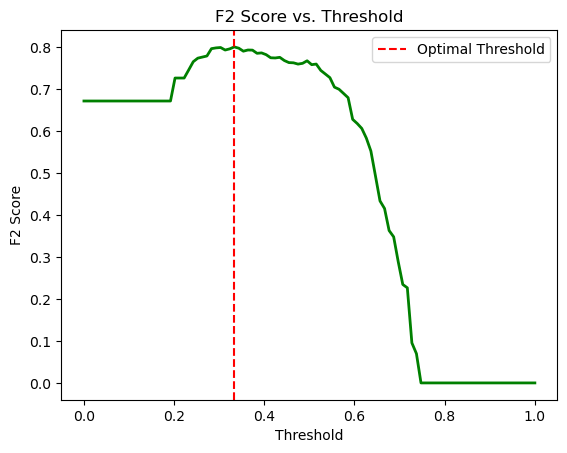

Optimal Threshold: 0.33333333333333337
Optimal F2 Score: 0.8002336448598131


In [122]:
thresholds = np.linspace(0, 1, 100)
f2_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob_lgbmada >= thresh).astype(int)
    f2_scores.append(fbeta_score(y_test, y_pred_thresh, beta=2))

# Find the threshold with the highest F2 score
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f2 = f2_scores[optimal_idx]

plt.figure()
plt.plot(thresholds, f2_scores, color='green', lw=2)
plt.axvline(optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs. Threshold')
plt.legend(loc='best')
plt.show()

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F2 Score: {optimal_f2}")


The plot we provided is a graph of the F2 score versus the decision threshold for our classification model. The F2 score is a metric that gives more weight to recall than precision. The optimal threshold is indicated by the red dashed line.

**Threshold Impact:**
   - At very low thresholds (close to 0), the F2 score is relatively high but not optimal. This suggests that the model is classifying most instances as positive, which can increase recall but may reduce precision.
   - At very high thresholds (close to 1), the F2 score drops to zero. This indicates that the model classifies very few instances as positive, severely reducing recall.
   - The optimal threshold balances recall and precision in a way that maximizes the F2 score, considering the higher importance of recall.

**Choosing the Optimal Threshold:**
   - The optimal threshold (around 0.33) should be used for making predictions with our model to achieve the best balance between precision and recall, maximizing the F2 score.
   
**Practical Considerations:**
   - In practical applications, using the optimal threshold helps ensure that the model is making predictions that align with our prioritization of recall over precision.
   - This is particularly important in scenarios where missing positive cases (false negatives) is more critical than falsely identifying negatives as positives (false positives).

In [123]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

clf_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(clf_ada, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2)

grid_search.fit(X_train, y_train)

best_model_lgbmada_thres = grid_search.best_estimator_

y_prob_lgbmada_thres = best_model_lgbmada_thres.predict_proba(X_test)[:, 1]

# Apply the optimal threshold
threshold = 0.33
y_pred_lgbmada_thres = (y_prob_lgbmada_thres >= threshold).astype(int)

print(classification_report(y_test, y_pred_lgbmada_thres))

f2 = fbeta_score(y_test, y_pred_lgbmada_thres, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada_thres)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.98      0.55      0.70       345
           1       0.47      0.97      0.63       141

    accuracy                           0.67       486
   macro avg       0.72      0.76      0.67       486
weighted avg       0.83      0.67      0.68       486

F2 Score: 0.7992998833138857
ROC AUC: 0.8652996196936992


**Comparation with default Threshold report :**

In [124]:
print(classification_report(y_test, y_pred_lgbmada))
f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")
roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       345
           1       0.61      0.82      0.70       141

    accuracy                           0.79       486
   macro avg       0.76      0.80      0.77       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7636122177954847
ROC AUC: 0.8652996196936992


Which version should we choose? Let's plot the confusion matrix for the threshold tuned version first and do some calculations before we decide

**Confusion Metrics after Threshold Tuning**

[[189 156]
 [  4 137]]


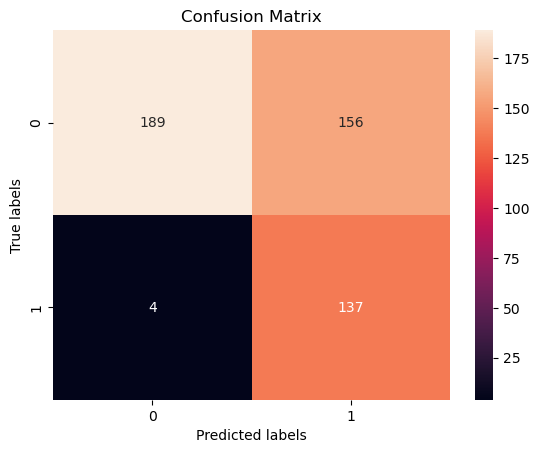

In [161]:
cmlgbmadathrs = confusion_matrix(y_test, y_pred_lgbmada_thres)
print(cmlgbmadathrs)

ax= plt.subplot()
sns.heatmap(cmlgbmadathrs, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Now let's do some calculations again from the perspective of our business problem statements.


- **False Positives (FP):** Instances where the model predicted 1 (positive) but the actual value was 0 (negative).
- **False Negatives (FN):** Instances where the model predicted 0 (negative) but the actual value was 1 (positive).


From the confusion matrix:

- **FP:** 156
- **FN:** 4
- Cost per False Positive (FP) = $173.5
- Cost per False Negative (FN) = $764

- **Total FP Loss:** 156 * $173.5 = $27,036
- **Total FN Loss:** 4 * $764 = $3,056
- **FNR :** 1 - 0.97 = 0.03 = 3 %

- **Total Loss:** $27,036 (FP Loss) + $3,056 (FN Loss) = $30,092 (FNR : 3%)


Apparently, the total estimated loss for the company due to the misclassifications (false positives and false negatives) is **$30,092 (FNR : 3%)**. That is lesser than our previous model, which is at **$32,693** with  **18.4 % FNR**

 **This concludes that we will use our Threshold Tuned Final Model.**

### 6.3 Recursive Feature Elimination

**RFECV Plot**

Optimal number of features: 17


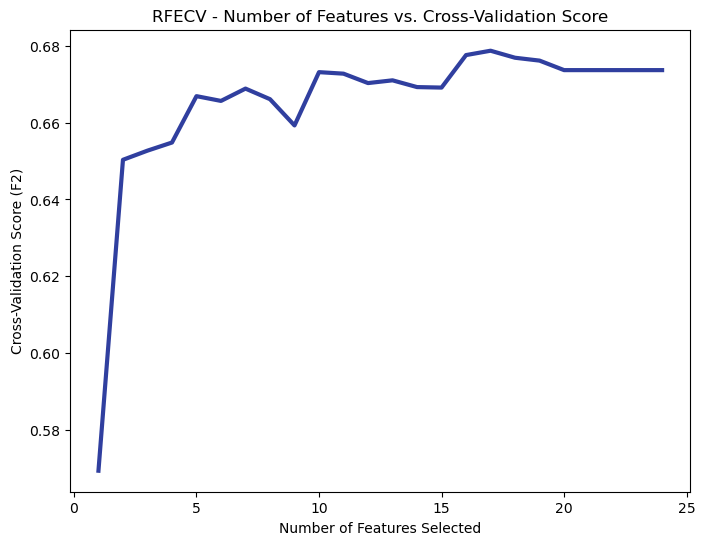

Selected features: ['numerical__tenure' 'numerical__MonthlyCharges'
 'categorical__Dependents_No' 'categorical__OnlineSecurity_No'
 'categorical__OnlineSecurity_Yes' 'categorical__OnlineBackup_No'
 'categorical__OnlineBackup_Yes' 'categorical__InternetService_DSL'
 'categorical__DeviceProtection_No' 'categorical__DeviceProtection_Yes'
 'categorical__TechSupport_No' 'categorical__TechSupport_Yes'
 'categorical__Contract_Month-to-month' 'categorical__Contract_One year'
 'categorical__Contract_Two year' 'categorical__PaperlessBilling_No'
 'categorical__PaperlessBilling_Yes']


In [126]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Initialize RFECV with the model
f2_scorer = make_scorer(fbeta_score, beta=2)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(estimator=model_lgbm, step=1, cv=cv, scoring=f2_scorer, n_jobs=-1, verbose=0)

X_train_transformed = preprocessor.fit_transform(X_train)  # Apply the preprocessor to the training data
rfecv.fit(X_train_transformed, y_train)

optimal_num_features = rfecv.n_features_

print(f"Optimal number of features: {optimal_num_features}")

plt.figure(figsize=(8, 6))
plt.title('RFECV - Number of Features vs. Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (F2)')
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.show()

if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = preprocessor.get_feature_names()

selected_features = np.array(feature_names)[rfecv.support_]

print("Selected features:", selected_features)



The RFECV process has identified that the combination of the listed 17 features provides an optimal balance between model complexity and performance as measured by the F2 score. Including these features in the model should result in better predictive performance while avoiding overfitting. This insight can be used to streamline the feature selection process and improve the efficiency and accuracy of our predictive model.

**Initiate RFECV to our Final Model**

In [127]:
numerical_features = ['tenure', 'MonthlyCharges']
categorical_features = [
    'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'
]

model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Perform RFECV to select features
preprocessor_rfe = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_features)
    ]
)

X_train_preprocessed = preprocessor_rfe.fit_transform(X_train)
feature_names = np.array(preprocessor_rfe.get_feature_names_out())

rfecv = RFECV(estimator=model_lgbm, step=1, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)
rfecv.fit(X_train_preprocessed, y_train)

# Get the selected features
selected_features_indices = rfecv.get_support(indices=True)
selected_features_names = feature_names[selected_features_indices]

# Extracting the selected numerical and categorical features from the preprocessor
selected_numerical_features = [numerical_features[i] for i in range(len(numerical_features))
                               if f'num__{numerical_features[i]}' in selected_features_names]
selected_categorical_features = [categorical_features[i] for i in range(len(categorical_features))
                                 if any(f'cat__{categorical_features[i]}' in name for name in selected_features_names)]

# Create a new pipeline with the selected features, ADASYN, and the model
preprocessor_rfe_final = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), selected_numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), selected_categorical_features)
    ]
)

clf_ada_rfe = ImbPipeline(steps=[
    ('preprocessor', preprocessor_rfe),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(clf_ada_rfe, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2)
grid_search.fit(X_train, y_train)

best_model_lgbmada_thres_rfe = grid_search.best_estimator_

y_prob_lgbmada_thres_rfe = best_model_lgbmada_thres_rfe.predict_proba(X_test)[:, 1]

# Remember the optimal threshold
threshold = 0.33
y_pred_lgbmada_thres_rfe = (y_prob_lgbmada_thres_rfe >= threshold).astype(int)

print(classification_report(y_test, y_pred_lgbmada_thres_rfe))

f2 = fbeta_score(y_test, y_pred_lgbmada_thres_rfe, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada_thres_rfe)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.99      0.54      0.70       345
           1       0.47      0.99      0.63       141

    accuracy                           0.67       486
   macro avg       0.73      0.76      0.67       486
weighted avg       0.84      0.67      0.68       486

F2 Score: 0.8072009291521487
ROC AUC: 0.8615685065268786


**List of total features and names after One-Hot Encoder Preprocessing (Before RFECV)** 

In [128]:
X_train_preprocessed_00 = preprocessor_rfe.fit_transform(X_train)

feature_names_after_preprocessing_00 = preprocessor_rfe.get_feature_names_out()
num_features_after_preprocessing_00 = len(feature_names_after_preprocessing_00)
print(f"Number of features after preprocessing: {num_features_after_preprocessing_00}")

print("Feature names after preprocessing:")
for feature_name in feature_names_after_preprocessing_00:
    print(feature_name)


Number of features after preprocessing: 22
Feature names after preprocessing:
num__tenure
num__MonthlyCharges
cat__Dependents_Yes
cat__OnlineSecurity_No
cat__OnlineSecurity_No internet service
cat__OnlineSecurity_Yes
cat__OnlineBackup_No
cat__OnlineBackup_No internet service
cat__OnlineBackup_Yes
cat__InternetService_DSL
cat__InternetService_Fiber optic
cat__InternetService_No
cat__DeviceProtection_No
cat__DeviceProtection_No internet service
cat__DeviceProtection_Yes
cat__TechSupport_No
cat__TechSupport_No internet service
cat__TechSupport_Yes
cat__Contract_Month-to-month
cat__Contract_One year
cat__Contract_Two year
cat__PaperlessBilling_Yes


**List of total and selected Features after applying RFECV**

In [129]:
rfecv.fit(X_train_preprocessed, y_train)

selected_features_indices_00 = rfecv.get_support(indices=True)
selected_features_names_00 = feature_names_after_preprocessing_00[selected_features_indices_00]

num_features_after_rfecv_00 = len(selected_features_indices_00)
print(f"Number of features after RFECV: {num_features_after_rfecv_00}")

print("Selected features after RFECV:")
for feature_name in selected_features_names_00:
    print(feature_name)


Number of features after RFECV: 16
Selected features after RFECV:
num__tenure
num__MonthlyCharges
cat__Dependents_Yes
cat__OnlineSecurity_No
cat__OnlineSecurity_Yes
cat__OnlineBackup_No
cat__OnlineBackup_Yes
cat__InternetService_DSL
cat__DeviceProtection_No
cat__DeviceProtection_Yes
cat__TechSupport_No
cat__TechSupport_Yes
cat__Contract_Month-to-month
cat__Contract_One year
cat__Contract_Two year
cat__PaperlessBilling_Yes


**List of removed Features after applying RFECV**

In [130]:
feature_mask = rfecv.support_

# Invert the mask to get the removed features
removed_feature_indices = ~feature_mask

removed_features_indices = np.where(removed_feature_indices)[0]
removed_features_names = [feature_names_after_preprocessing_00[i] for i in removed_features_indices]

print("Removed features after RFECV:")
for feature_name in removed_features_names:
    print(feature_name)


Removed features after RFECV:
cat__OnlineSecurity_No internet service
cat__OnlineBackup_No internet service
cat__InternetService_Fiber optic
cat__InternetService_No
cat__DeviceProtection_No internet service
cat__TechSupport_No internet service


Some algorithms in RFECV involve randomness (e.g., in cross-validation folds). As a result, the optimal number of features might vary slightly between different runs or iterations. THat is why, even though from the plot it said 17 features as optimal features, but in reality we get 16 from iterations.

**Confusion Metrics after applying RFECV**

[[187 158]
 [  2 139]]


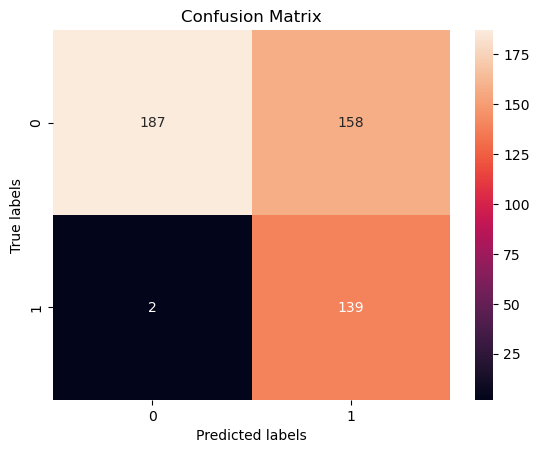

In [162]:
cmfinal = confusion_matrix(y_test, y_pred_lgbmada_thres_rfe)
print(cmfinal)

ax= plt.subplot()
sns.heatmap(cmfinal, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


Where:
- **True Negatives (TN)** = 187
- **False Positives (FP)** = 158
- **False Negatives (FN)** = 2
- **True Positives (TP)** = 139
- **Type 1 Error (False Positive)**: $173.5 per customer
- **Type 2 Error (False Negative)**: $764 per customer

1. **Total Loss for Type 1 Errors:**
   - 158 × 173.5 = 27,413

2. **Total Loss for Type 2 Errors:**
   - 2 × 764 = 1,528

3. **Total Loss:**
   - 27,413 + 1,528 = 28,941

4. **FNR:**
    - 2 / 2 + 139 = 1.42 %

Previous Final Model with applied Threshold was at **$30,092 (FNR : 3%)**. While with RFE applied, **$28,941 (FNR : 1.42 %)**. This concludes that we will also **apply RFE features for our Final Model.**



### 6.4 Learning Curves and Standard Deviation

#### 6.5.1 Learning Curves

   Training Size  Train Mean Score  Train Std Dev  CV Mean Score  CV Std Dev  \
0            349          0.716540       0.026501       0.652845    0.018955   
1           1135          0.767170       0.007333       0.689102    0.009835   
2           1921          0.753713       0.004425       0.698361    0.017404   
3           2707          0.755008       0.004065       0.712561    0.015807   
4           3493          0.755531       0.002233       0.714182    0.010215   

   Test Mean Score  Test Std Dev  
0         0.723735      0.046051  
1         0.723735      0.046051  
2         0.723735      0.046051  
3         0.723735      0.046051  
4         0.723735      0.046051  


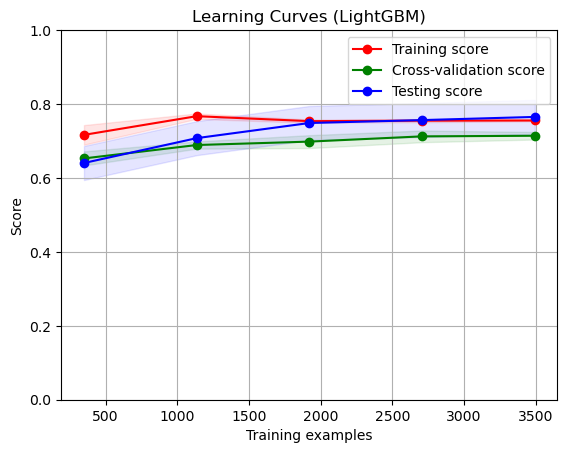

In [132]:
def plot_learning_curve_with_std(estimator, title, X, y, X_test, y_test, scoring, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring, return_times=False
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    test_set_scores = []
    for train_size in train_sizes:
        X_train_subset = X[:train_size]
        y_train_subset = y[:train_size]
        
        estimator.fit(X_train_subset, y_train_subset)
        y_pred_test = estimator.predict(X_test)
        test_set_scores.append(fbeta_score(y_test, y_pred_test, beta=2))
    
    test_set_scores_mean = np.mean(test_set_scores)
    test_set_scores_std = np.std(test_set_scores)
    
    results_df_std = pd.DataFrame({
        'Training Size': train_sizes,
        'Train Mean Score': train_scores_mean,
        'Train Std Dev': train_scores_std,
        'CV Mean Score': test_scores_mean,
        'CV Std Dev': test_scores_std,
        'Test Mean Score': [test_set_scores_mean] * len(train_sizes),
        'Test Std Dev': [test_set_scores_std] * len(train_sizes)
    })
    
    print(results_df_std)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.plot(train_sizes, test_set_scores, 'o-', color="b", label="Testing score")
    plt.fill_between(train_sizes, np.array(test_set_scores) - test_set_scores_std,
                     np.array(test_set_scores) + test_set_scores_std, alpha=0.1, color="b")
    
    plt.legend(loc="best")
    plt.ylim(0, 1)
    plt.grid()
    return plt

title = "Learning Curves (LightGBM)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = make_scorer(fbeta_score, beta=2)

# Use the best model from GridSearchCV
estimator = best_model_lgbmada_thres_rfe

plot_learning_curve_with_std(estimator, title, X_train, y_train, X_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
plt.show()


The learning curves displayed in the graph provide insights into the performance of a LightGBM model with increasing amounts of training data. Below are the analysis based on the curves:

1. **Training Score (Red Curve)**:
   - The training score starts high and remains relatively stable, indicating that the model is able to fit the training data well. This suggests a low bias, as the model performs well on the data it has seen.

2. **Cross-validation Score (Green Curve)**:
   - The cross-validation score starts lower than the training score but increases as more training examples are used, eventually converging towards the training score. This suggests that as the model is exposed to more data, it generalizes better to unseen data.
   - The gap between the training score and the cross-validation score reduces with more training data, indicating that adding more training examples helps mitigate overfitting.

3. **Testing Score (Blue Curve)**:
   - The testing score follows a similar trend to the cross-validation score, starting lower and gradually increasing as more training examples are provided.
   - The convergence of the testing score towards the cross-validation score with more training examples indicates that the model's performance on unseen test data is consistent with its performance during cross-validation, suggesting good generalization.

4. **Error Bands (Shaded Areas)**:
   - The shaded areas around each curve represent the variability (standard deviation) of the scores. The error bands for the training score are narrow, indicating consistent performance on the training data.
   - The error bands for the cross-validation and testing scores are wider initially but narrow as more training data is used, suggesting that the model's performance becomes more stable with more data.

5. **General Observations**:
   - The increasing trend in cross-validation and testing scores with more training examples suggests that the model benefits from additional data.
   - The decreasing gap between training and cross-validation/testing scores with more data suggests that overfitting is being reduced, and the model is generalizing better.

6. **Model Performance**:
   - The overall performance, as indicated by the scores, appears to be good, with the model achieving scores close to 0.8 for larger training sets. This indicates a well-performing model.

Overall, the learning curves suggest that the LightGBM model is performing well, with increased data leading to better generalization and reduced overfitting.

#### 6.5.2 Standard Deviation

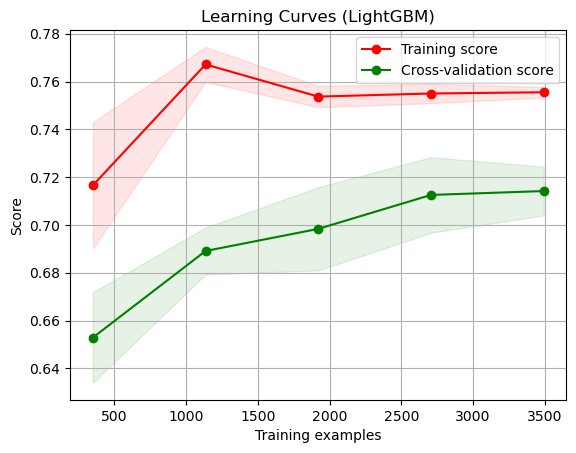

In [133]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    return train_scores_std, test_scores_std

f2_scorer = make_scorer(fbeta_score, beta=2)

title = "Learning Curves (LightGBM)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_std, test_std = plot_learning_curve(best_model_lgbmada_thres_rfe, title, X_train, y_train, cv=cv, n_jobs=-1, scoring=f2_scorer)
plt.show()


In [134]:
stddata = {
    'Training STD': train_std,
    'Validation STD': test_std
}
df_stddata = pd.DataFrame(stddata)

df_stddata

,Training STD,Validation STD
0,0.026501,0.018955
1,0.007333,0.009835
2,0.004425,0.017404
3,0.004065,0.015807
4,0.002233,0.010215


Based on the provided table, here is the updated analysis:

1. **General Trend Analysis**:
   - **Training STD**: The standard deviation values for training are consistently decreasing from 0.026501 to 0.002233. This indicates that the model is becoming more consistent in its performance on the training data over the iterations or epochs.
   - **Validation STD**: The standard deviation values for validation also show a decreasing trend, starting at 0.018955 and decreasing to 0.010215. This suggests that the model's performance on validation data is also becoming more consistent over time.

2. **Model Stability**:
   - The decreasing trend in training STD suggests that the model is stabilizing and becoming less variable in its performance on the training set.
   - The validation STD shows a similar decreasing trend, indicating that the model is also becoming more consistent in its performance on the validation set. This is a positive sign as it suggests that the model's improvements on the training data are translating to the validation data, reducing overfitting concerns.

The table suggests that the model's performance is becoming more stable and consistent on both the training and validation data, indicating good generalization and reduced overfitting.

**Cross Validation F2 score and Standard Deviation (5-Fold)**

In [135]:
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform cross-validation for F2 score
f2_scores = cross_val_score(best_model_lgbmada_thres_rfe, X_train, y_train, cv=cv, scoring=f2_scorer, n_jobs=-1) 

f2_mean = np.mean(f2_scores)
f2_std = np.std(f2_scores)

print(f"Mean F2 Score: {f2_mean}")
print(f"F2 Score Standard Deviation: {f2_std}")


Mean F2 Score: 0.7169491724051247
F2 Score Standard Deviation: 0.012911652548944124


Using cross-validation, it provides insights into how well the model generalizes to unseen data and the variability in its performance across different training subsets. our model seems to perform well, with a mean F2 score of 0.716 and a relatively low standard deviation of 0.012, indicating consistent performance across different evaluations or folds.

### 6.5 Time Complexity

In [136]:
# Measuring time to fit the model
start_time = time.time()
best_model_lgbmada_thres_rfe.fit(X_train, y_train)
fit_time = time.time() - start_time
print(f"Time taken to fit the model: {fit_time:.4f} seconds")

# Measuring time to make predictions
start_time = time.time()
y_pred = best_model_lgbmada_thres_rfe.predict(X_test)
predict_time = time.time() - start_time
print(f"Time taken to make predictions: {predict_time:.4f} seconds")


Time taken to fit the model: 1.0283 seconds
Time taken to make predictions: 0.0469 seconds



**Timing Information**
1. **Time to Fit the Model**:
   - The time taken to fit the model: 1.0283 seconds
   - This indicates that the training process for this model on the given dataset is relatively fast, which is one of the strengths of the LightGBM algorithm.

2. **Time to Make Predictions**:
   - The time taken to make predictions: 0.0469 seconds
   - This shows that the prediction process is extremely quick, making LightGBM suitable for real-time prediction tasks.

Overall, the LightGBM model demonstrates quick and efficient handling of the training and prediction processes, making it a suitable choice for tasks requiring fast turnaround times.

### 6.6 Predict Unseen Data and Validation Sets

#### 6.6.1 Unseen Data

In [163]:
best_model_lgbmada_thres_rfe.fit(X_train, y_train)

# Predict on test set
y_pred_unseen = best_model_lgbmada_thres_rfe.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_unseen))

f2 = fbeta_score(y_test, y_pred_unseen, beta=2)
print(f"F2 Score: {f2}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       345
           1       0.57      0.82      0.68       141

    accuracy                           0.77       486
   macro avg       0.74      0.79      0.75       486
weighted avg       0.81      0.77      0.78       486

F2 Score: 0.7571801566579635


[[259  86]
 [ 25 116]]


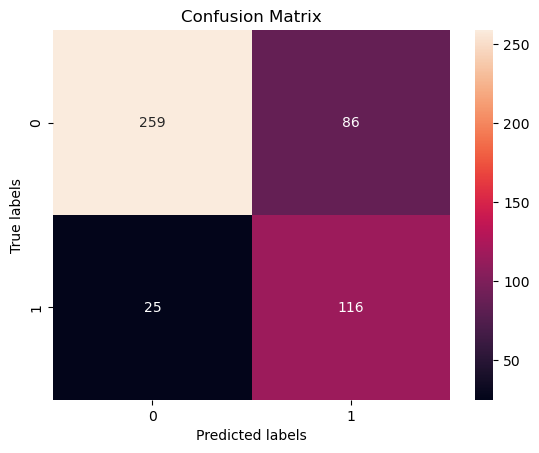

In [164]:
cmunseen = confusion_matrix(y_test, y_pred_unseen)
print(cmunseen)

ax= plt.subplot()
sns.heatmap(cmunseen, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Our model seems to perform reasonably well on the unseen data, with good precision, high recall, and F1-score for both classes. But what's more important is the F2 score that reached 75.7. Just a little below our Final Model predict train F2 which is 80.7

The confusion matrix indicates that the model performs well on the unseen test data. The total error cost amounts to $34,011 from our simulation type error calculations.

#### 6.6.2 Validation Sets (1-Fold)

In [139]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

ytestval=best_model_lgbmada_thres_rfe.predict(X_val)
print(classification_report(y_val, ytestval))

f2 = fbeta_score(y_val, ytestval, beta=2)
print(f"F2 Score: {f2}")

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       320
           1       0.54      0.90      0.67       117

    accuracy                           0.77       437
   macro avg       0.74      0.81      0.75       437
weighted avg       0.84      0.77      0.78       437

F2 Score: 0.7918552036199095


The result from predicting Validation Sets in single fold also gives us a whooping 0.791 in F2 Score, meaning it is working well, since our F2 predict seen is 0.807. Not far off from that

### 6.7 Feature Importances

Length of all_feature_names: 24
Length of feature_importance: 22


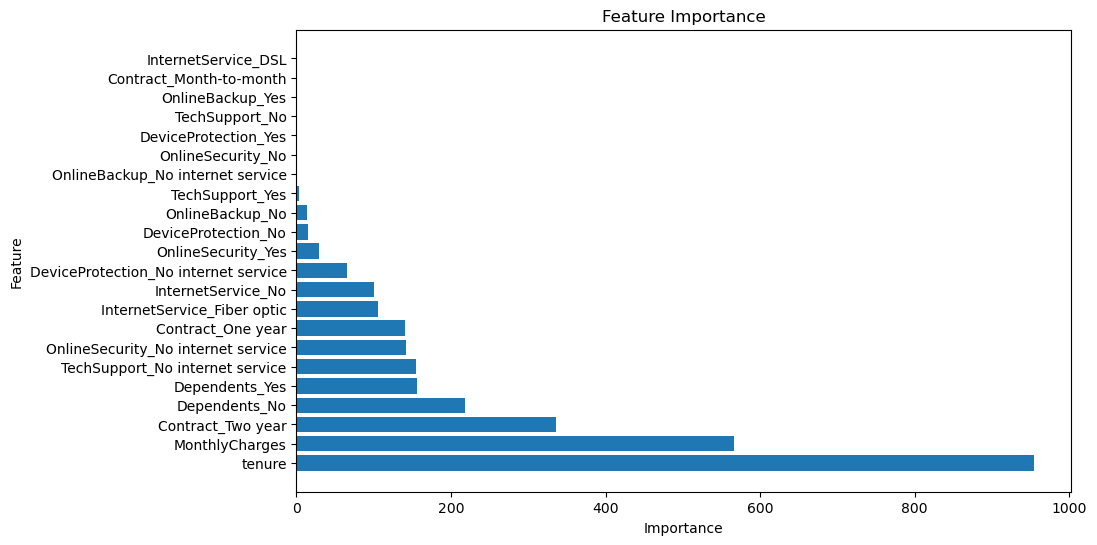

In [140]:
feature_importance = best_model_lgbmada_thres_rfe.named_steps['classifier'].feature_importances_

# Get feature names
all_feature_names = (
    selected_numerical_features + 
    [f'{cat}_{val}' for cat in selected_categorical_features for val in X_train[cat].unique()]
)

print("Length of all_feature_names:", len(all_feature_names))
print("Length of feature_importance:", len(feature_importance))

# Adjusting feature names to match the length of feature importance
all_feature_names = all_feature_names[:len(feature_importance)]

feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [141]:
print(feature_importance_df)

                                 feature  importance
0                                 tenure         955
1                         MonthlyCharges         566
21                     Contract_Two year         336
2                          Dependents_No         218
3                         Dependents_Yes         156
18       TechSupport_No internet service         155
6     OnlineSecurity_No internet service         142
19                     Contract_One year         140
10           InternetService_Fiber optic         106
12                    InternetService_No         100
15  DeviceProtection_No internet service          65
5                     OnlineSecurity_Yes          29
14                   DeviceProtection_No          15
8                        OnlineBackup_No          14
17                       TechSupport_Yes           3
9       OnlineBackup_No internet service           0
4                      OnlineSecurity_No           0
13                  DeviceProtection_Yes      

Below are the Key insights for our analysis :

1. **Top Features**:
   - **Tenure**: The most important feature by a significant margin, suggesting that the duration of a customer's tenure is the strongest predictor in the model.
   - **MonthlyCharges**: The second most important feature, indicating that the amount a customer is charged monthly is also a strong predictor.
   - **Contract_Two year**: The third most important feature, implying that the type of contract (two-year) influences the prediction significantly.

2. **Moderately Important Features**:
   - **Contract_One year**: Indicates that one-year contracts also have a moderate level of importance.
   - **InternetService_Fiber optic**: Suggests that customers using fiber optic internet service have a notable impact on the model.
   - **Dependents_No/Yes**: The presence or absence of dependents also moderately influences the model.
   - **TechSupport_No internet service**: Indicates the impact of tech support availability on customers with no internet service.
   - **OnlineSecurity_No internet service**: Similar to tech support, online security for customers without internet service also plays a role.

3. **Less Important Features**:
   - Features like `DeviceProtection_No internet service`, `OnlineSecurity_Yes`, `DeviceProtection_No`, `OnlineBackup_No`, and `TechSupport_Yes` have lower importance but still contribute to the model.
   - `InternetService_DSL` and `Contract_Month-to-month` have the least importance among the listed features.

**Observations**

- **Customer Tenure**: The duration a customer has been with the service is the most critical factor, which might suggest that longer-tenure customers are less likely to churn.
- **Monthly Charges**: The monthly cost also plays a crucial role, possibly indicating that higher charges could be linked to churn risk.
- **Contract Type**: The type of contract (particularly two-year contracts) significantly affects predictions, possibly suggesting that longer-term contracts reduce churn risk.
- **Service Type and Support**: Features related to internet service type (fiber optic vs. DSL), and the presence of support services like tech support and online security, also influence the model's predictions.

Overall, the feature importance chart provides a clear understanding of which factors are most influential in the model's predictions, with `tenure` and `monthly charges` being the top predictors.

### 6.8 About Our Final Model

This section will discuss about our final model general information. Let's say it's a sub-conclusion of our conclusions

In [142]:
final_model = best_model_lgbmada_thres_rfe

LightGBM is an advanced version of the Gradient Boosting algorithm that uses a leaf-wise approach to expand Decision Trees vertically. This technique involves adding branches until further splitting is impossible or the maximum tree depth is achieved. To efficiently handle large-scale data and many features, LightGBM employs Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB).

GOSS helps LightGBM to minimize the data instances needed for training without sacrificing accuracy. It retains instances with high gradients and randomly discards those with low gradients. This approach has been demonstrated to yield a more precise gain estimation than uniform random sampling, particularly when information gain values vary significantly.

EFB, on the other hand, helps to manage sparsity in datasets by combining mutually exclusive features into fewer, but more informative, features. This reduces the number of features while retaining the crucial ones.

In [143]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('adasyn', ADASYN(random_state=42)),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.01,
                                min_child_samples=40, random_state=42,
                                verbose=-100))])



The diagram above a machine learning pipeline constructed using scikit-learn. Let's break down how each component in the pipeline works:

1. **Preprocessor (ColumnTransformer)**:
   - The `ColumnTransformer` allows applying different preprocessing steps to different subsets of the features.
   - **Numerical Features**:
     - **MinMaxScaler**: This scales the numerical features to a specified range, typically [0, 1]. This helps to normalize the data, ensuring that all numerical features contribute equally to the model.
   - **Categorical Features**:
     - **OneHotEncoder**: This encodes categorical features as a one-hot numeric array. For each categorical feature, it creates a new binary feature for each category. This is necessary because many machine learning algorithms require numeric input.

2. **ADASYN (Adaptive Synthetic Sampling)**:
   - ADASYN is an oversampling technique that generates synthetic samples for the minority class. It helps to balance the dataset by addressing class imbalance, which can improve the performance of the classifier.

3. **LGBMClassifier (LightGBM Classifier)**:
   - This is the classifier used to train the model. LightGBM is an efficient and powerful gradient boosting framework that uses tree-based learning algorithms. It is particularly well-suited for large datasets and complex models.

**How the Pipeline Works :**

1. **Data Input**: The data is fed into the pipeline.
2. **Preprocessing**:
   - Numerical features are scaled using `MinMaxScaler`.
   - Categorical features are imputed to be encoded into a binary matrix.
3. **ADASYN**: The preprocessed data is then passed to ADASYN, which generates synthetic samples to balance the class distribution.
4. **Classification**: The balanced data is finally fed into the `LGBMClassifier` to train the model.

**Workflow :**

1. **Training Phase**:
   - The entire pipeline is fitted on the training data.
   - During fitting, each step in the pipeline is applied in sequence.
   - The `ColumnTransformer` preprocesses the features.
   - `ADASYN` generates synthetic samples to balance the class distribution.
   - The `LGBMClassifier` is trained on the balanced dataset.

2. **Prediction Phase**:
   - For making predictions, the pipeline processes new data in the same sequence.
   - The new data is preprocessed using the `ColumnTransformer`.
   - The preprocessed data is then used by the trained `LGBMClassifier` to make predictions.




**END OF CHAPTER 6**

****

## **7. Conclusion And Recommendations**

1. **Final Model Conclusions :** Informations about our Final Model, its limitations and trustworthiness
2. **The Impact of Final Model in Business :** This will show how much money could be saved for the company if we use the Final Model.
3. **SHAP for Churn Characteristics :** a detailed explanation by SHAP from our Final Model regarding churn characteristics and factors that influenced it.
4. **Recommendations For Business :** This will discuss suggestions for the stakeholders based from our SHAP Analysis and Machine Learning Model thus far.
5. **Recommendations For Improving Final Model :** This will discuss suggestions for our current Final ML Model for improvements in the future. Whether by the dataset improvements or the Model structure itself.

To review back, here are the points that we expect to answer by this point from **Chapter 1** on section **1.3 Goals** :

- The characteristics of customers who left the service (`yes` Churn / class:1 )
- Predictions of the customers' chances churning (Stopped using service) 
- Strategies in how to prevent customers' from churning
- Most significant factors that influenced customers to churn

### 7.1 Final Model Conclusions :

#### 7.1.1 Model Conclusions :

In [165]:
report_final = classification_report(y_test, y_pred_lgbmada_thres_rfe)
print('Final Model Report : \n', report_final)
f2 = fbeta_score(y_test, y_pred_lgbmada_thres_rfe, beta=2)
print(f"F2 Score: {f2}")
roc_auc = roc_auc_score(y_test, y_prob_lgbmada_thres_rfe)
print(f"ROC AUC: {roc_auc}")

Final Model Report : 
               precision    recall  f1-score   support

           0       0.99      0.54      0.70       345
           1       0.47      0.99      0.63       141

    accuracy                           0.67       486
   macro avg       0.73      0.76      0.67       486
weighted avg       0.84      0.67      0.68       486

F2 Score: 0.8072009291521487
ROC AUC: 0.8615685065268786


*The conclusions below is sufficient to answer Goals point number 2*

Based on the classification report and the context of customer churn, we can draw the following conclusions:

- **Precision and Recall for Class 0 (Non-Churn)**:
  - **Precision**: 0.99 - This means that 99% of the customers predicted to not churn are indeed not churning.
  - **Recall**: 0.54 - This indicates that the model correctly identifies 54% of the actual non-churning customers.
  - **F1-Score**: 0.70 - This is the harmonic mean of precision and recall for non-churning customers.

- **Precision and Recall for Class 1 (Churn)**:
  - **Precision**: 0.47 - This means that 47% of the customers predicted to churn are actually churning.
  - **Recall**: 0.99 - This indicates that the model correctly identifies 99% of the actual churning customers.
  - **F1-Score**: 0.63 - This is the harmonic mean of precision and recall for churning customers.

- **Overall Metrics**:
  - **Accuracy**: 0.67 - The overall accuracy of the model is 67%.
  - **F2 Score**: 0.8072 - This score emphasizes recall more than precision.
  - **ROC AUC**: 0.8616 - This indicates good discriminatory ability of the model.

The model demonstrates a strong ability to identify customers who are likely to churn (high recall for class 1). However, the precision for predicting churning customers is relatively low, meaning that a significant number of customers predicted to churn will not actually churn. This results in Type 1 errors where resources may be wasted on retention efforts for customers who are not at risk of churning.

On the other hand, the high recall for churning customers (class 1) ensures that the model captures almost all customers who are at risk of leaving, minimizing the risk of losing revenue due to undetected churn (Type 2 errors). Therefore, The model is very effective at identifying potential churners.

In [167]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__min_child_samples': 40, 'classifier__n_estimators': 100, 'classifier__num_leaves': 31}


- Our Final model best parameter from Hyperparameter tuning are :

    1. classifier__learning_rate: 0.01
    2. classifier__min_child_samples: 40
    3. classifier__n_estimators: 100
    4. classifier__num_leaves: 31

Each parameter informations and its interpretation :

1. **classifier__learning_rate**: This parameter controls the step size at each iteration while moving toward a minimum of the loss function. A lower learning rate requires more iterations but can lead to more precise convergence. In real life, this can be compared to how quickly or slowly you adjust your strategy based on feedback. A lower learning rate implies a more cautious approach, while a higher learning rate implies a more aggressive approach.

2. **classifier__min_child_samples**: This parameter specifies the minimum number of samples required to be at a leaf node. A smaller value can lead to overfitting, while a larger value can lead to underfitting. In real life, this can be likened to the minimum number of observations or data points required to make a decision. A smaller value might mean you're making decisions based on very little evidence, while a larger value might mean you're being overly conservative.

3. **classifier__n_estimators**: This parameter sets the number of boosting stages or trees to be built. Each boosting stage learns from the mistakes of the previous stages. A larger number of trees can lead to better performance but also increases computation time. In real life, this can be compared to how many experts or advisors you consult before making a decision. More experts might provide more accurate insights but also take more time and resources.

4. **classifier__num_leaves**: This parameter controls the maximum number of leaves or terminal nodes in each tree. Increasing this value can improve training accuracy but might also lead to overfitting. In real life, this can be likened to the complexity or granularity of your decision-making process. More leaves allow for more detailed decisions, but too many might result in decisions that are too specific and not generalizable.

From our experiments and evaluations so far, here are what we have decided to apply to our final model :

- **Algorithm :** Light Gradient Boosting Machine Classifier
- **Algorithm Parameter :** Balanced Class Weight
- **Resampling :** Yes (Oversampling with ADASYN)
- **Hyperparameter Tuning :** Yes (GridSearchCV, 4 Parameters)
- **Calibration :** No (Default)
- **Threshold :** Yes (Optimal at 0.33)
- **Recursive Feature Elimination :** Yes (from 22 to 16 Features)

#### 7.1.2 Model Limitations :

In [153]:
continuous_features = ['tenure', 'MonthlyCharges']
feature_ranges = {feature: (df[feature].min(), df[feature].max()) for feature in continuous_features}

categorical_features = ['Contract', 'InternetService', 'Dependents', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
feature_categories = {feature: df[feature].unique().tolist() for feature in categorical_features}

constraints = {**feature_ranges, **feature_categories}

constraints_df = pd.DataFrame(constraints.items(), columns=['Feature', 'Constraint'])

print("Constraints:")
print(constraints_df)


Constraints:
            Feature                            Constraint
0            tenure                               (0, 72)
1    MonthlyCharges                        (18.8, 118.65)
2          Contract  [Month-to-month, Two year, One year]
3   InternetService                [DSL, Fiber optic, No]
4        Dependents                             [Yes, No]
5  PaperlessBilling                             [Yes, No]
6    OnlineSecurity        [No, Yes, No internet service]
7      OnlineBackup        [No, Yes, No internet service]
8  DeviceProtection        [Yes, No internet service, No]
9       TechSupport        [Yes, No, No internet service]


**This model is only valid within the range of dataset used. And those are :**

* `tenure` between 0 and 72 months
* `MonthlyCharges` between 18.8 and 118.65
* `Contract` in terms of Month-to-month, One year, and Two Year
* `InternetService` as 'DSL', 'Fiber Optic', and 'No'
* `Dependent, Paperless Billing` with values 'Yes' or 'No'
* `OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport` with choices 'Yes', 'No', or 'No internet service'

Anything outside of that range, whether it would be lesser or greater than for the numericals, and other words/status for the categoricals, would be invalid

#### 7.1.3 Model Trustworthiness :

**Below are insights into factors that could affect the trustworthiness of our model:**

- **Imbalanced Data**: As indicated by the classification reports, if one class is significantly underrepresented, the model may perform poorly on that class.
- **Insufficient Data**: The learning curves suggest that more training data could improve model performance.
- **Poor Quality Data**: Noise, errors, or outliers in the data can lead to unreliable model predictions. And because we use `MinMaxScaler` for our data since there are no outliers, if the case of outliers exists, `MinMaxScaler` would perform poorly.

By ensuring comprehensive and appropriate preprocessing, addressing class imbalance, and improving data quality, we can enhance the trustworthiness of our model.

### 7.2 The Impact of Final Model in Business :

To calculate how much money the company could save using the model and without the model, we need to analyze the cost associated with the errors (Type 1 and Type 2) and the predictions of the model. Below are the breakdowns :

1. **Calculate the cost without the model**: This is the baseline where we assume no predictions are made and all potential churn is lost revenue.

2. **Calculate the cost with the model**: This includes the costs associated with the errors made by the model (False Positives and False Negatives).

**Cost without the model**

Without any model, we assume every customer in the dataset could potentially churn, so the cost is the sum of all the possible churns multiplied by the cost of a Type 2 Error (False Negative).

- Total customers: 486
- Cost per Type 2 Error (False Negative): $ 764

Total cost without the model = 486 * 764 = $ 371,304 

**Cost with the model (From Unseen Data Metrics)**

Using the confusion matrix values:
- True Negatives (TN): 259
- False Positives (FP): 86
- False Negatives (FN): 25
- True Positives (TP): 116

And the costs associated with the errors:
- Cost per Type 1 Error (False Positive): $173.5
- Cost per Type 2 Error (False Negative): $764

The total cost with the model is calculated by summing the costs of the false positives and false negatives:

(FP * Cost per FP) + (FN * Cost per FN)
= (86 * 173.5) + (25 * 764)
= 14,911 + 19,100
= $ 34,011

Total savings = $ 371,304 - $ 34,011 = **$ 337,293**

The company could save **$ 337,293** by using the model to predict customer churn compared to not using any model.

### 7.3 SHAP for Churn Characteristics :

In [170]:
clf_ada_rfe_forshap = ImbPipeline(steps=[
    ('preprocessor', preprocessor_rfe),
    ('adasyn', ADASYN(random_state=42))
])

X_train_over, y_train_over = clf_ada_rfe_forshap.fit_resample(X_train, y_train)

In [169]:
best_model_lgbmada_thres_rfe['classifier']

LGBMClassifier(class_weight='balanced', learning_rate=0.01,
               min_child_samples=40, random_state=42, verbose=-100)

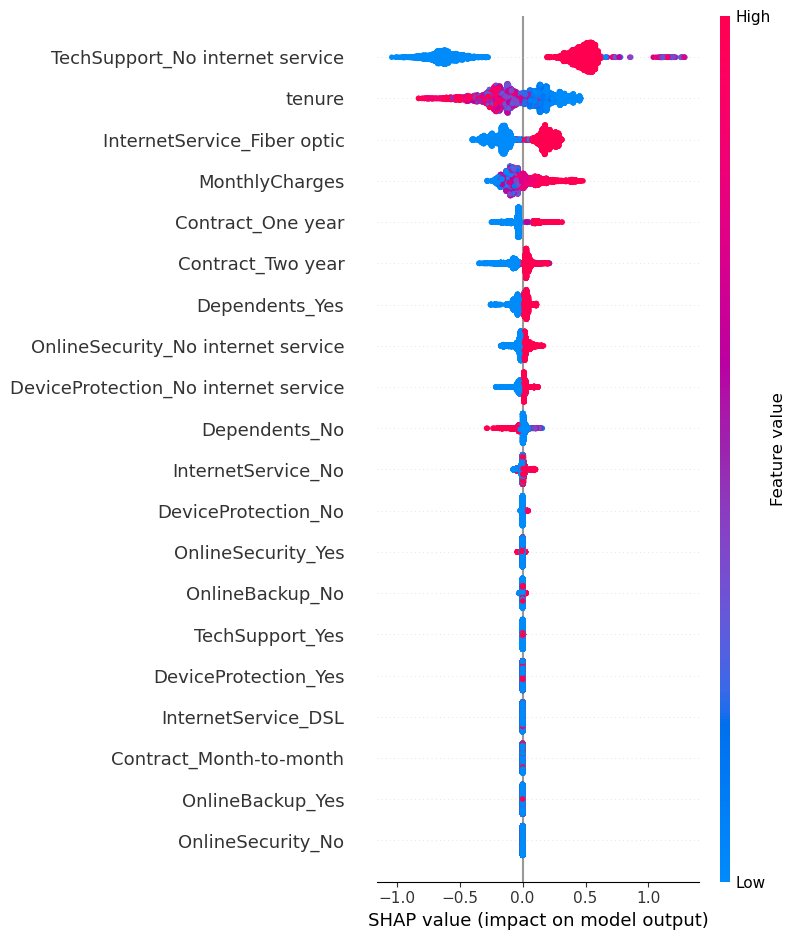

In [179]:
explainer = shap.TreeExplainer(best_model_lgbmada_thres_rfe['classifier'])
shap_values = explainer.shap_values(X_train_over)
shap_values_matrix = np.vstack(shap_values)

shap.summary_plot(shap_values_matrix, X_train_over, feature_names=all_feature_names)

*The conclusions below is sufficient to answer Goals point number 1 and 4*

SHAP (SHapley Additive exPlanations) values indicate the impact of each feature on the model's output. Below are the detailed analysis of the plot :

1. **TechSupport_No internet service**: 
   - Customers with no internet service have a strong negative SHAP value, indicating they are less likely to churn.
   - Conversely, having tech support (but no internet service) has a strong positive impact on churn.

2. **Tenure**:
   - Longer tenure has a strong negative impact on churn, meaning customers who have been with the company longer are less likely to churn.
   - Short tenure is associated with a higher likelihood of churn.

3. **InternetService_Fiber optic**:
   - Customers with fiber optic internet service are more likely to churn, as indicated by the positive SHAP values.

4. **MonthlyCharges**:
   - Higher monthly charges are associated with a higher likelihood of churn, evident from the positive SHAP values for high monthly charges.

5. **Contract (One year, Two year)**:
   - One-year and two-year contracts both have negative SHAP values, suggesting that longer contracts reduce the likelihood of churn.
   - The impact is more pronounced for two-year contracts.

6. **Dependents (Yes, No)**:
   - Having dependents is associated with a lower likelihood of churn, as indicated by the negative SHAP values for "Dependents_Yes".
   - Conversely, customers without dependents are more likely to churn.

7. **OnlineSecurity_No internet service**:
   - Similar to tech support, having no internet service strongly reduces the likelihood of churn.

8. **DeviceProtection (No internet service, No)**:
   - Customers without internet service are less likely to churn, but having device protection and no internet service has a less clear impact.

9. **OnlineSecurity (Yes, No)**:
   - Having online security service reduces the likelihood of churn, as indicated by the negative SHAP values for "OnlineSecurity_Yes".
   - Not having online security service has a positive impact on churn.

10. **OnlineBackup (Yes, No)**:
    - Customers with online backup service are less likely to churn, while those without it are more likely to churn.

11. **TechSupport (Yes, No)**:
    - Similar to online security, having tech support reduces the likelihood of churn, indicated by negative SHAP values for "TechSupport_Yes".

12. **InternetService (DSL, No)**:
    - Customers with DSL internet service have a lower likelihood of churn compared to those with fiber optic.

13. **Contract_Month-to-month**:
    - Month-to-month contracts have a positive impact on churn, indicating that customers on these contracts are more likely to churn compared to those on longer-term contracts.

Overall, the plot reveals several key insights :
- **Contract length and tenure** are significant factors, with longer contracts and longer tenure reducing churn.
- **Service-related features** (like tech support, online security, online backup) generally reduce churn if customers have these services.
- **Internet service type** and **monthly charges** are also crucial, with fiber optic service and higher charges increasing the likelihood of churn.

Understanding these factors can help the company take targeted actions to reduce churn, such as offering incentives for long-term contracts or providing additional services to high-risk customers.

### 7.4 Recommendations For Business :

*The conclusions below is sufficient to answer Goals point number 3*

Based on the SHAP analysis of the churn dataset, several strategies can be employed by a telecommunications business to prevent customer churn. These strategies are aligned with the key insights derived from the SHAP values. Below are the list of targeted strategies that came to mind :

1. **Encourage Long-Term Contracts**:
   - **Strategy**: Offer incentives for customers to sign up for one-year or two-year contracts. This can include discounts, free months, or additional features.
   - **Rationale**: Longer contracts are associated with lower churn rates.

2. **Improve Customer Experience for Fiber Optic Users**:
   - **Strategy**: Investigate and address the pain points specific to fiber optic customers, such as service reliability, speed issues, or customer support.
   - **Rationale**: Fiber optic users show a higher likelihood of churning, indicating potential dissatisfaction.

3. **Implement Loyalty Programs for Long Tenure Customers**:
   - **Strategy**: Develop loyalty programs that reward long-term customers with benefits like exclusive discounts, priority customer service, or special offers.
   - **Rationale**: Customers with longer tenure are less likely to churn, and rewarding loyalty can enhance retention.

4. **Adjust Pricing for High Monthly Charges**:
   - **Strategy**: Review the pricing structure to ensure it is competitive. Consider offering tiered pricing plans, bundles, or discounts for high-paying customers.
   - **Rationale**: High monthly charges are linked to higher churn rates.

5. **Promote Add-On Services (Tech Support, Online Security, Online Backup)**:
   - **Strategy**: Actively promote and potentially bundle services like tech support, online security, and online backup with existing plans. Consider offering these services at a discount or for free during the initial months.
   - **Rationale**: Customers with these services are less likely to churn.

6. **Targeted Marketing for Dependents**:
   - **Strategy**: Create marketing campaigns that highlight family-friendly plans and benefits, aiming at customers with dependents.
   - **Rationale**: Customers with dependents are less likely to churn, so emphasizing family benefits can attract and retain such customers.

7. **Offer Personalized Retention Plans for Month-to-Month Contract Holders**:
   - **Strategy**: Identify month-to-month contract holders and offer them personalized retention plans that encourage them to switch to longer-term contracts through special offers or discounts.
   - **Rationale**: Month-to-month contracts are linked to higher churn rates.

8. **Enhance Customer Support for New Users**:
   - **Strategy**: Provide excellent onboarding experiences and proactive customer support for new users to ensure they are satisfied from the beginning.
   - **Rationale**: Short tenure customers are more likely to churn, so addressing their issues early can improve retention.

9. **Special Offers for Users Without Dependents**:
   - **Strategy**: Create targeted offers and benefits for users without dependents to increase their satisfaction and loyalty.
   - **Rationale**: Customers without dependents are more likely to churn, so tailored offers can help retain them.

10. **Regular Customer Satisfaction Surveys and Feedback Loops**:
    - **Strategy**: Implement regular surveys and feedback mechanisms to understand customer satisfaction and address issues promptly.
    - **Rationale**: Continuous improvement based on customer feedback can reduce dissatisfaction and churn.

11. **Enhance Service Quality and Reliability**:
    - **Strategy**: Invest in improving the overall quality and reliability of services, especially for high-churn segments like fiber optic users.
    - **Rationale**: Service quality issues are a significant driver of churn, and improving them can enhance customer retention.

By implementing these strategies, a telecommunications company can effectively address the factors contributing to churn and enhance customer retention, leading to improved business performance.

### 7.5 Recommendations For Improving Final Model :

- Try other ML algorithms and also retry hyperparameter tuning with different parameters.
- Experiment with different oversampling techniques other than the three experiments we conducted above.
- Add new features or columns that contain customer satisfaction levels for each service, the duration or cost of using existing products such as voice calls, messages, and internet, to further determine whether these factors also affect churn.
- Increase the data, especially for the minority class (Churn), to help improve the model's performance by eliminating data imbalance.
- Analyze the data for instances where the model still has False Negatives and False Positives to understand their reasons and characteristics.

**END OF CHAPTER 7**

****

## **8. Deployment**





In [ ]:
# Save the model
joblib.dump(best_model_lgbmada_thres_rfe, 'best_model_lgbmada_thres_rfe.pkl')


['best_model_lgbmada_thres_rfe.pkl']

**THANK YOU FOR READING THIS LONG JUPYTER NOTEBOOK! :)**

****